## Arima/Sarima : Le processus stationnaire

1) Rappel modele de decomposition d'une Time series stationnaire

exemple : Modele prophet

    Un mod√®le de d√©composition consiste √† appliquer des transformations pour simplifier sa s√©rie temporelle. C‚Äôest une m√©thode tr√®s efficace et tr√®s g√©n√©rale, son application est omnipr√©sente en analyse des s√©ries temporelles, avec diff√©rentes variations.

    ==> Composantes tendancielles et p√©riodiques




2) Indicateur pour 

    -qualifier la times series : Instationnaire / stationnaire

    La stationnarit√© veut dire que les statistiques de la s√©rie temporelle n‚Äô√©voluent pas sur une periode
    
    -identifier la predictabilit√© de la series 
    
    Indicateur: variance, covariance, Autocorelation

    La corr√©lation statistique r√©sume la force de la relation entre deux variables.

        Le coefficient de corr√©lation de Pearson est un nombre compris entre -1 et 1 qui d√©crit respectivement une corr√©lation n√©gative ou positive. Une valeur de z√©ro indique qu'il n'y a pas de corr√©lation.

        Les diagrammes d'autocorr√©lation et d'autocorr√©lation partielle sont largement utilis√©s dans l'analyse et la pr√©vision de s√©ries chronologiques.

nb: Ce sont des trac√©s qui r√©sument graphiquement la force d'une relation avec une observation dans une s√©rie chronologique avec des observations √† des pas de temps ant√©rieurs. La diff√©rence entre l'autocorr√©lation et l'autocorr√©lation partielle peut √™tre difficile et d√©routante en pr√©vision de s√©ries chronologiques.

        Les trac√©s de la fonction d'autocorr√©lation et de la fonction d'autocorr√©lation partielle pour une s√©rie chronologique racontent une histoire tr√®s diff√©rente.



### PROCEDURE TIME SERIES :


La d√©marche est la suivante :
    
   1) stationnarisation (√©ventuellement) ; D√©composition saisonni√®re,Diff√©renciation,M√©thode empirique,

    Notons que :
    Quelle(s) que soi(en)t la(les) m√©thode(s) retenue(s), on proc√®de de mani√®re it√©rative : on effectue une premi√®re diff√©renciation, si celle-ci d'av√®re insuffisante, on en effectue une seconde, etc.
    En pratique on consid√®re rarement d>2  et D>2

   2) identification a priori de mod√®les potentiels,

    Une fois la stationnarisation effectu√©e, on peut se consacrer aux choix potentiels des polyn√¥mes AR et MA
    En pratique (surtout pour les mod√®les SARIMA), on essaye d'identifier les autocorr√©lations simples et partielles "significatives" pour caler ensuite des polyn√¥mes AR et MA qui refl√®tent ces liens temporels.

    Afin d'obtenir des mod√®les potentiels, l'id√©al est de regarder l'autocorr√©logramme partiel afin d'√©mettre une hypoth√®se sur la partie autor√©gressive (simple et saisonni√®re), la tester puis regarder l'autocorr√©logramme simple (et partiel) du r√©sidu afin d'identifier compl√®tement un mod√®le. Cette d√©marche it√©rative permet en g√©n√©ral d'obtenir plusieurs mod√®les potentiels.

   3) estimation des mod√®les potentiels,

    On estime les mod√®les potentiels √† l'aide des m√©thodes classiques : maximum de vraisemblance (bas√©e sur l'hypoth√®se gaussienne du r√©sidu) ou moindres carr√©s.
    
   4) v√©rification des mod√®les potentiels,

    Afin de v√©rifier la validit√© des mod√®les estim√©s, on peut verifier la significativit√© des param√®tres et la blancheur du r√©sidu.
    
   5) choix d√©finitif d'un mod√®le,

Ce choix s'op√®re entre les mod√®les potentiels retenus via :

    Des crit√®res d'information bas√©s sur l'information de Kullback, par exemple, les crit√®res d'Akaike (AIC) et de Schwartz (BIC) 
    Des crit√®res bas√©s sur le pouvoir pr√©dictif.
    Une fois ce choix effectu√©, le mod√®le retenu est utilis√© √† des fins de pr√©vision.
    
   6) pr√©vision √† l'aide du mod√®le choisi,

    La fonction de pr√©vision s'obtient assez facilement √† partir des √©critures dites autor√©gressive ou moyenne mobile.

   7) analyse a posteriori de la pr√©vision.

    L'analyse a posteriori permet de quantifier les √©carts entre les pr√©visions et les r√©alisations, en tronquant la s√©rie d'un certain nombre de points (notons que le mod√®le doit √™tre correctement estim√© sur la s√©rie tronqu√©e.

    On utilise des crit√®res d'erreur comme l'erreur quadratique moyenne (Root Mean Square Error : RMSE ou l'erreur relative absolue moyenne (Mean Average Percentage Error : MAPE)


Notons que :
Les mod√®les SARIMA permettent de mod√©liser des s√©ries qui pr√©sentent une saisonnalit√©.
Estimer un mod√®le SARIMA se ram√®ne en pratique √† l'estimation d'un mod√®le ARMA sur la s√©rie diff√©renci√©e.


In [5]:
import math                         
import numpy as np                  
import time
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns             
plt.rcParams["figure.figsize"]=(10, 6)

On consid√®re le jeu de donn√©es air pekin, concernant la qualit√© de l'air

"pollution.csv"

#### Charger le fichier avec Time index

In [6]:


polution_ts=pd.read_csv('Pollutions.csv', parse_dates=['year_month_day_hour'], index_col='year_month_day_hour')

polution_ts.head()

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
year_month_day_hour                                                           
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0

Proposer une visualisation de la pollution sur la p√©riode d'√©tude.

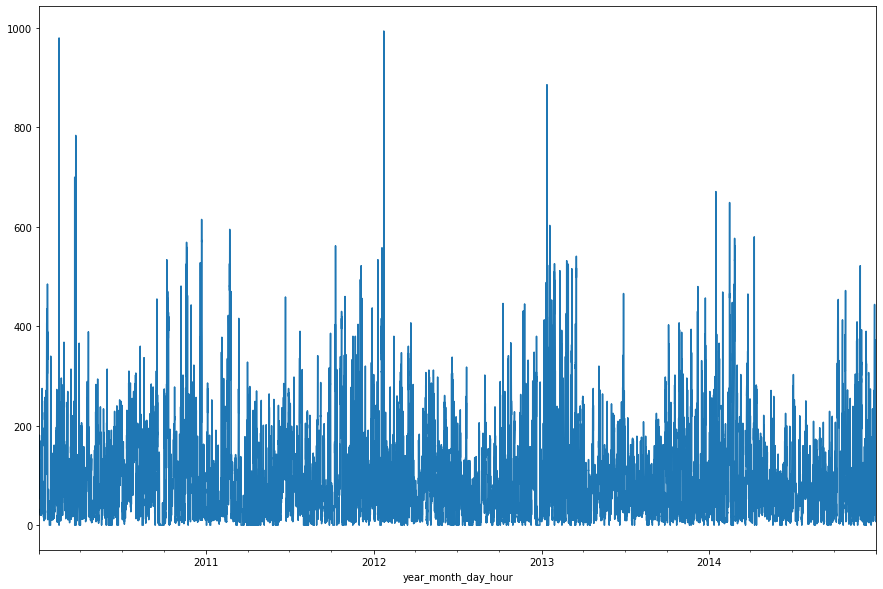

In [7]:
polution_ts['pollution'].plot(figsize=(15,10));

Donner une repr√©sentation par mois de la pollution. Quel est le mois le plus pollu√© ?

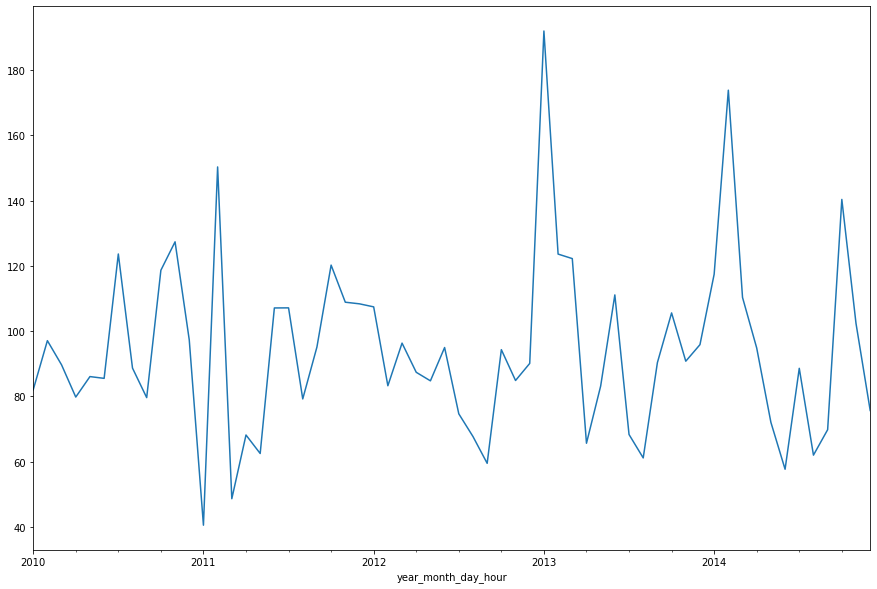

In [8]:
polution_ts['pollution'].resample('M').mean().plot(figsize=(15,10));

### Etude de stationnarit√©

#### D√©composition de la serie

En utilisant seasonal_decompose, decomposer votre serie temporelle sous plusieurs √©chantillonage:

- Par mois
- Par semaines


Un mod√®le de d√©composition consiste √† appliquer des transformations pour simplifier sa s√©rie temporelle. C‚Äôest une m√©thode tr√®s efficace et tr√®s g√©n√©rale, son application est omnipr√©sente en analyse des s√©ries temporelles, avec diff√©rentes variations.

[Rappel decompostion serie temporelle](https://slideplayer.fr/slide/5546777/17/images/4/MODELES+DE+DECOMPOSITION.jpg
)


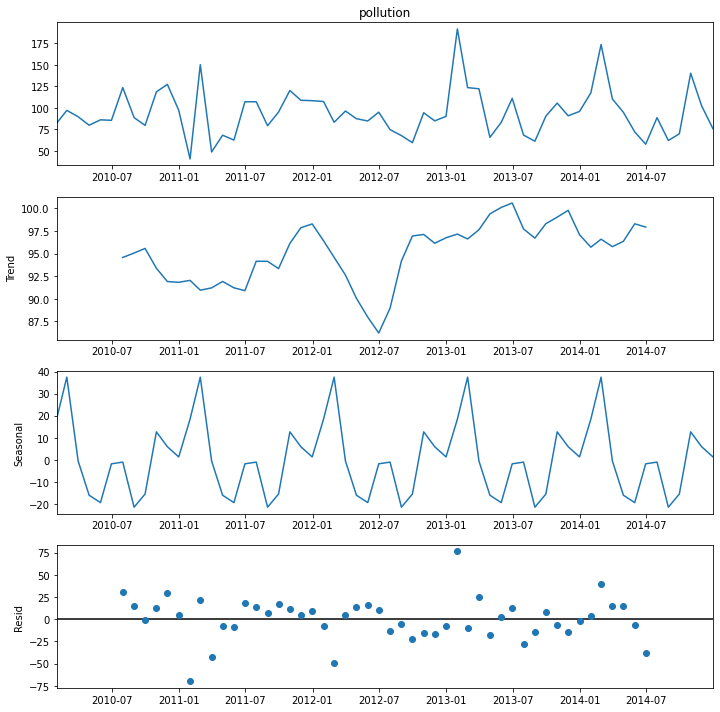

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('M').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

R√©aliser cette decompostion en changeant de frequence d'echantillonage (la semaine par exemple)


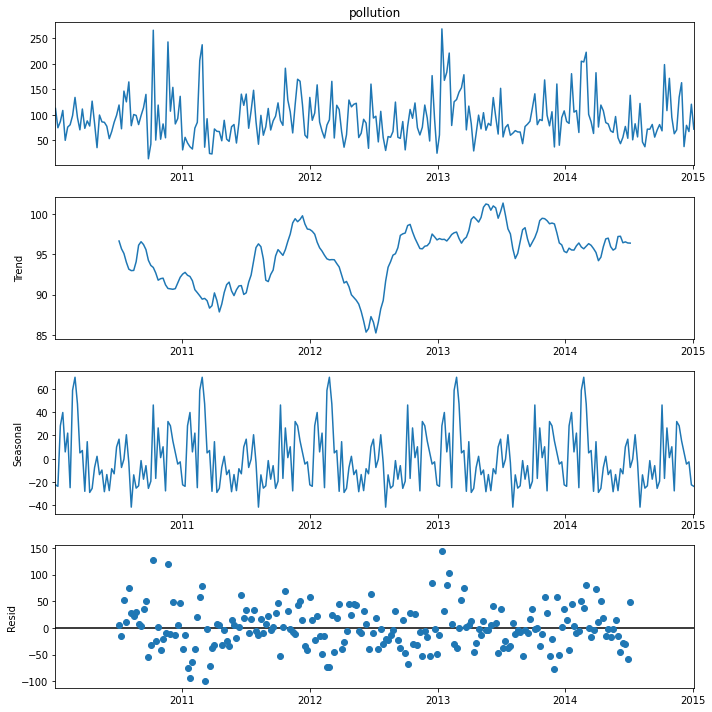

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('w').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

#### Utiliser le score de Dickey-Fuller 

==> extraire une avec p_value = sm.tsa.stattools.adfuller(y)[1] inferieure √† 0.05 pour verifier la stationnarit√© de votre serie 

Echantillonage par semaine

Rappel p value

https://pro.arcgis.com/fr/pro-app/latest/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm#:~:text=Si%20votre%20score%20z%20est,r%C3%A9sultat%20de%20processus%20spatiaux%20al%C3%A9atoires.

Table de Dickey-Fuller

https://www.real-statistics.com/statistics-tables/augmented-dickey-fuller-table/

In [11]:

from statsmodels.tsa.stattools import adfuller

x=polution_ts["pollution"].resample('w').mean()

p_value = adfuller(x)[1]

p_value

9.985107390865025e-26

Si la valeur p du test de Dickey-Fuller n'est pas suffisamment significative (< 5 %), le risque de rejeter l'hypothese nulle H0 alors qu'elle est vraie augmente. 

#### Pause sur la diff√©renciation :

- Differenciation
- Ecriture via operateur de retard L


Il est donc possible de rendre stationnaire une s√©rie non-stationnaire en la diff√©renciant d fois, c‚Äôest √† dire de consid√©rer la s√©rie {st‚àíst‚àíd}. On parle d‚Äôop√©rateur retard, not√© L, appliqu√© d fois.


Si c'est le cas utiliser x.diff(1) pour differencier votre serie d'un ordre

In [12]:
adfuller(x.diff(1).dropna())[1]

5.813166165835688e-20

#### Rappel 

L‚Äôun des concepts essentiels dans l‚Äô√©tude des s√©ries temporelles est la ‚Äústationnarit√©‚Äù. Il s‚Äôagit de savoir si les observations d‚Äôune s√©rie temporelle sont g√©n√©r√©es par une structure* qui change, ou non, avec le temps.

Une autre fa√ßon pratique de v√©rifier si une s√©rie temporelle est stationnaire ou pas est d‚Äô√©tudier l‚Äô√©volution dans le temps de la structure de sa moyenne, de sa variance et de ses corr√©lations crois√©es avec elle-m√™me.

En effet, dans ce cas, la moyenne, la variance et la d√©pendance entre les valeurs de la s√©rie ont une structure finie et ind√©pendante du temps

In [13]:
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#### Coder une fonction d'autocorellation (sur la serie echantillon√©e par semaine)

- #### Commencer par creer une fonction d' auto-covariance empirique

- #### G√©n√©raliser en creant une fonction d' auto-correlation empiriques.


formules p14 http://math.univ-lille1.fr/~viano/economcours.pdf


- #### Calculer l'autocorelation sur la serie et celle avec un decalage d'un pas de temps

In [14]:
x=polution_ts["pollution"].dropna().resample('w').mean()


def autocov(x,l):
    m=x.mean()
    n=len(x)
    tmp=0
    for j in range(0, n-l):
        tmp=tmp+(x[j]-m)*(x[j+l]-m)
    return tmp/n


def autocov0(x):
    m=x.mean()
    n=len(x)
    tmp=0
    for j in range(0, n):
        tmp=tmp+(x[j]-m)*(x[j]-m)
    return tmp/n

def auto_correlation(x,j):
    return autocov(x,j)/autocov0(x)

auto_correlation(x,1),auto_correlation(x,2)

(0.15482772975349263, 0.10265069737033239)

#### Verifier vos calculs avec la fonction acf()  import√©es precedemment

In [15]:
acf(x)[1],acf(x)[2]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


(0.1548277297534926, 0.10265069737033232)

#### Analyse des autocorrelogrammes

Nous pouvons calculer la corr√©lation des observations de s√©ries chronologiques avec des observations avec des pas de temps pr√©c√©dents, appel√©s d√©calages. √âtant donn√© que la corr√©lation des observations de la s√©rie chronologique est calcul√©e avec les valeurs de la m√™me s√©rie √† des moments pr√©c√©dents, cela s'appelle une corr√©lation en s√©rie ou une autocorr√©lation.

Un trac√© de l'autocorr√©lation d'une s√©rie chronologique par d√©calage est appel√© la fonction de corr√©lation automatique , ou l'acronyme ACF . Ce graphique est parfois appel√© un corr√©logramme ou un graphique d'autocorr√©lation.

Vous pouvez egalement comparer les resultats de votre fonction avec ceux du plot_acf() ci dessous

Les intervalles de confiance sont dessin√©s sous forme de c√¥ne. Par d√©faut, il est d√©fini sur un intervalle de confiance de 95 %, ce qui sugg√®re que les valeurs de corr√©lation en dehors de ce code sont tr√®s probablement une corr√©lation et non un hasard statistique.


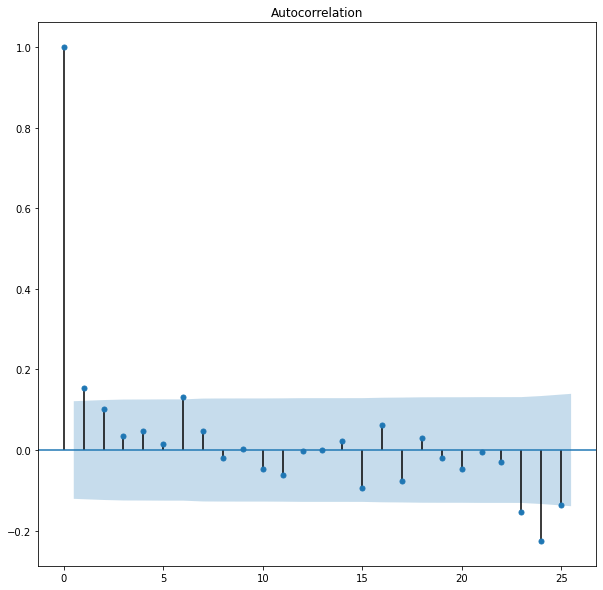

In [16]:
a=plot_acf(x)

La sortie ACF ne pr√©sente pas de d√©croissance explicite vers 0, ce qui traduit un probl√®me de non-stationnarit√©. 

==> On effectue donc une diff√©renciation. 

Nous esperons ainsi se rapprocher d'un fonction stationnaire

Il existe de nombreux tests statistiques***  pour d√©terminer si une s√©rie est stationnaire ou pas. Il se peut que la moyenne, la variance et les autocorr√©lations de la s√©rie originale ne soient pas constantes dans le temps mais que les statistiques relatives aux changements de la s√©rie entre d p√©riodes sont constantes. 

#### Nous differencions chaque terme avec son precedent et nous esperons obtenir une courbe d'ACF qui tende plus rapidement vers 0 

Tracer cette nouvelle representation

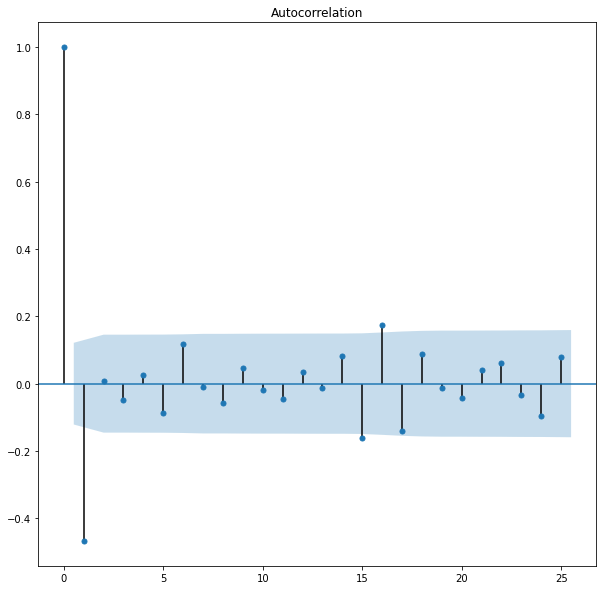

In [17]:
a=plot_acf(x.diff(1).dropna())

#### PACF (Auto correlation partielle)

Le PACF exprime la corr√©lation entre les observations faites √† deux moments dans le temps tout en tenant compte de l‚Äôinfluence √©ventuelle d‚Äôautres points de donn√©es. 

Une autocorr√©lation partielle est un r√©sum√© de la relation entre une observation dans une s√©rie chronologique et des observations √† des pas de temps ant√©rieurs, les relations des observations interm√©diaires √©tant "supprim√©es".

Ce sont ces corr√©lations interm√©diaires que la fonction d'autocorr√©lation partielle cherche √† √©liminer. Sans entrer dans les calculs, c'est l'intuition de l'autocorr√©lation partielle.

Nous pouvons utiliser le PACF pour d√©terminer le nombre optimal de termes √† utiliser dans le mod√®le AR.

[Explication autocorrelation partielle](https://slideplayer.fr/slide/520920/2/images/26/5.+Autocorr%C3%A9lation+partielle.jpg)

[Vulgarisation autocorrelation partielle](https://slideplayer.fr/slide/1847935/7/images/3/D%C3%A9finition+intuitive+des+autocorr%C3%A9lations+partielles.jpg)


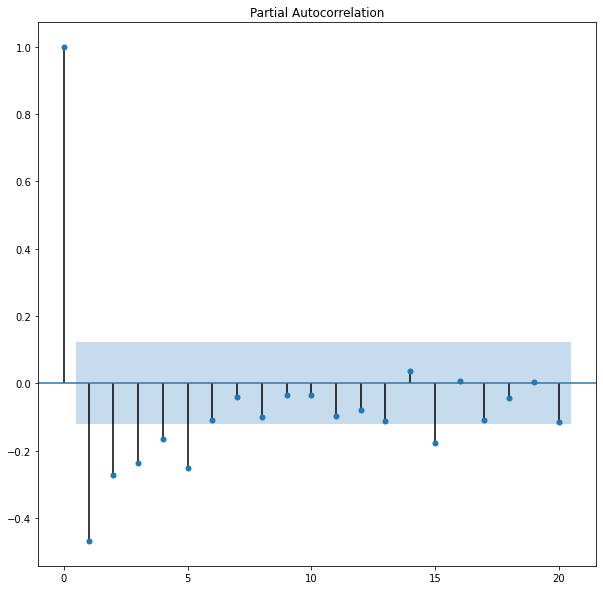

In [18]:
_ =plot_pacf(x.diff(1).dropna(),lags=20)

#### Intuition d'autor√©gression

Consid√©rons une s√©rie chronologique qui a √©t√© g√©n√©r√©e par un processus d'autor√©gression (AR) avec un d√©calage de k .

Nous savons que le PACF ne d√©crit que la relation directe entre une observation et son d√©calage. Cela sugg√©rerait qu'il n'y aurait pas de corr√©lation pour les valeurs de d√©calage au-del√† de k .

C'est exactement l'attente des trac√©s PACF pour un processus AR(k).

#### Intuition moyenne mobile

Consid√©rons une s√©rie chronologique qui a √©t√© g√©n√©r√©e par un processus de moyenne mobile (MA) avec un d√©calage de k .

N'oubliez pas que le processus de moyenne mobile est un mod√®le d'autor√©gression de la s√©rie chronologique des erreurs r√©siduelles des pr√©dictions pr√©c√©dentes. Une autre fa√ßon de penser au mod√®le de moyenne mobile est qu'il corrige les pr√©visions futures en fonction des erreurs commises sur les pr√©visions r√©centes.

Nous nous attendrions √† ce que l'ACF pour le processus MA(k) montre une forte corr√©lation avec les valeurs r√©centes jusqu'au d√©calage de k, puis une forte baisse jusqu'√† une corr√©lation faible ou nulle. Par d√©finition, c'est ainsi que le processus a √©t√© g√©n√©r√©.


Encore une fois, c'est exactement l'attente des trac√©s ACF pour un processus MA(k).



#### Mod√®le ARIMA

Le mod√®le ARIMA, appel√© aussi mod√®le de Box-Jenkis, est la combinaison de trois termes : le terme autor√©gressif (AR), le terme de diff√©renciation (I) et le terme de moyennes mobiles (MA).

 
- Le terme autor√©gressif suppose que la valeur √† l‚Äôinstant t est une combinaison lin√©aire des valeurs des instants pr√©c√©dents plus un terme d‚Äôerreur.

- La partie moyennes mobiles suppose que la s√©rie est une combinaison lin√©aire de bruits blancs****

- Enfin, le terme de diff√©renciation est une application de l‚Äôop√©rateur retard L une ou plusieurs fois.




Trois entiers (p, d, q) sont g√©n√©ralement utilis√©s pour param√©trer les mod√®les ARIMA :

- p : nombre de termes autor√©gressifs (ordre AR)

- d : nombre de diff√©rences non saisonni√®res (ordre de diff√©renciation)

- q : nombre de termes moyens mobiles (ordre MA)


#### Identification et estimation de mod√®les ARMA :


En pratique, lorsque l‚Äôon doit ajuster un mod√®le AR, MA ou ARMA √† des donn√©es r√©elles la premi√®re question qui se pose est celle du choix des ordres p et q du mod√®le ARMA (on consid√®re que les AR et MA sont un cas particulier d‚ÄôARMA avec respectivement q=0 et p=0). 
Pour choisir ces ordres, nous pouvons exploiter les r√©sultats suivants:


![Times_series.png](attachment:Times_series.png)

Ainsi, on estime un mod√®le ARIMA(5,1,1) au vu des autocorr√©logrammes empiriques simples et partiels et de la differenciation de rang 1 r√©alis√©e.

Le processus ARMA :
Comme vous vous en doutez, le mod√®le ARMA est tout simplement une combinaison d‚Äôun processus AR et d‚Äôun processus MA. Cela permet de mod√©liser des s√©ries temporelles plus complexes.

Un mod√®le ARMA d‚Äôordre (p,q) s‚Äô√©crit donc sous la forme :


![ARMA](Data/ARIMA.png.webp)

Avec Œµ l‚Äôerreur, (ùõº1, ‚Ä¶,ùõºp)   et (ùõΩ1, ‚Ä¶,ùõΩq) des r√©els.

In [19]:
! pip install statsmodels

In [20]:
pip install statsmodels==0.12.2

In [21]:
import statsmodels.api as sm
x=polution_ts["pollution"].resample('W').mean().dropna()

# J'entraine avec toutes les observations sauf les 10 dernieres (pour evaluer le modele)
mod = sm.tsa.arima.ARIMA(x[:-10],order=(5, 1, 1))

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                  252
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1309.068
Date:                Tue, 17 May 2022   AIC                           2632.137
Time:                        12:17:43   BIC                           2656.815
Sample:                    01-03-2010   HQIC                          2642.068
                         - 10-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1496      0.059      2.547      0.011       0.034       0.265
ar.L2          0.0949      0.069      1.374      0.170      -0.041       0.230
ar.L3          0.0210      0.060      0.350      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Tableau r√©capitulatif : 

    Dans le tableau r√©capitulatif, il y a 3 sections distinctes. 
    
    La deuxi√®me colonne de la section I contient des mesures utiles qui sont utilis√©es pour comparer diff√©rents mod√®les ARIMA. 
    
    En r√®gle g√©n√©rale, le mod√®le avec une probabilit√© logarithmique plus √©lev√©e ou un IC inf√©rieur (AIC, BIC ou HQIC) est meilleur, et vice versa. 
    
##########################################    
**Les crit√®res de choix de mod√®les les plus courants sont :**

- le crit√®re AIC (Aka√Øke Information Criterion), qui sera g√©n√©ralement pr√©f√©r√© si l‚Äôobjectif de l‚Äô√©tude est de faire de la pr√©vision
 
AIC = ‚àí2 logL(Œ∏) + 2ŒΩ, o√π L(.) est la vraisemblance du mod√®le, Œ∏ repr√©sente les param√®tres du mod√®le et ŒΩ le nombre de ces param√®tres

o√π, loi normale sera not√©e : N (¬µ,œÉ2).
<img src="Data/like3.png" alt="Drawing" style="width: 400px;"/>

    
- le crit√®re BIC (Bayesian Information Criterion) sera quant √† lui g√©n√©ralement pr√©f√©r√© si l‚Äôobjectif de l‚Äô√©tude est de s‚Äôajuster √† la s√©rie observ√©e, et est d√©fini par :

BIC = ‚àí2 logL(Œ∏) + nŒΩ

o√π n est le nombre d‚Äôobservations de la s√©rie.

    Les mod√®les ayant la plus petite valeur du crit√®re devront √™tre choisis.
    Ces deux crit√®res conduisent donc √† s√©l√©ctionner des mod√®les dont la vraisemblance est grande, en la p√©nalisant par la complexit√© du mod√®le.
    
        
##########################################   

    La section II du tableau r√©capitulatif donne des informations sur les diff√©rents coefficients des composantes AR et MA, et les constantes utilis√©es dans le mod√®le. 
    
    La colonne coef contient la valeur r√©elle des coefficients et la colonne P>|Z|colonne contient les niveaux de confiance. Cette colonne indique si les coefficients sont significatifs. 
    
    Si le niveau de confiance est fix√© √† 5 % et les coefficients significatifs ont une valeur < 0,05 dans cette colonne ==> dans ce cas, tous les coefficients semblent significatifs.


Selon le "model summary", celui ci rencontre la condition d'independance du residu (pas de correlation). En effet, la p-value du Ljung-Box test (Prob(Q)) est supperieur √† 0.05, donc nous pouvons rejeter l'hypothese nulle d'independance, et nous pouvons esperer que la distribution du residu soit homoscedastic (variance constante) car la p-value du Heteroskedasticity test (Prob(H)) est plus petite que 0.05.


D'autre part, nous pouvons qualifier notre modele en analysant son residu.

Le residu, c'est ce qu'il reste de la serie apres avoir enlever le volet tendance et saisonnier.

Si celui ci passe le test de blancheur (nous voulons un residu tel un bruit blanc), alors notre model devrait etre pas mal

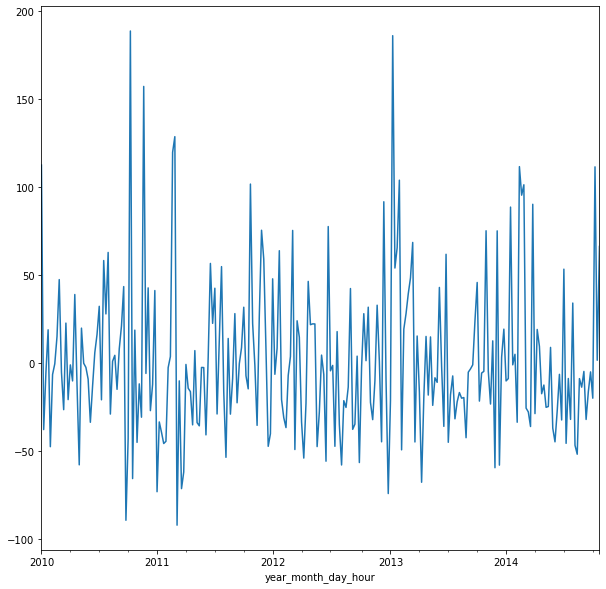

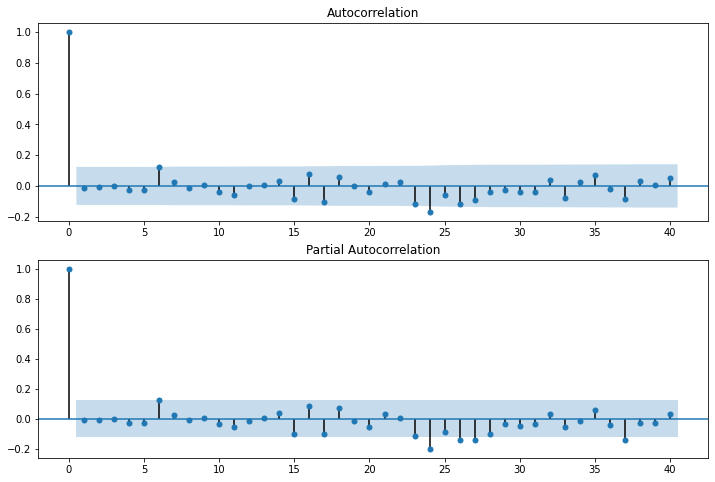

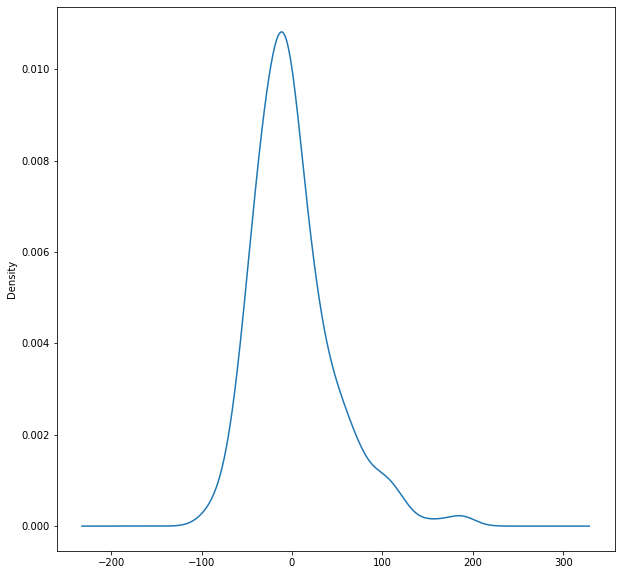

In [22]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

results.resid.plot(kind="kde")

#### R√©sidus : 

Si un mod√®le fonctionne bien, les r√©sidus ou les erreurs commises par le mod√®le ne doivent pas contenir de mod√®le sous-jacent. 

Si tel est le cas, le mod√®le ne parvient pas √† capturer toutes les informations contenues dans les donn√©es.

Ainsi, un mod√®le r√©ussi devrait aboutir √† des r√©sidus qui n'ont pas de motifs, ou les r√©sidus g√©n√©r√©s dans un tel cas devraient ressembler √† du bruit blanc. Nous esperons que les residus soient normallement distribu√©s centr√©e sur une moyenne nulle.

Ceci peut √™tre v√©rifi√© en s'assurant qu'il n'y a pas de retards significatifs dans les trac√©s ACF et PACF des r√©sidus. 

Les trac√©s ACF et PACF des r√©sidus de ce mod√®le, comme on le voit dans l'image ci-dessus, n'ont presque pas de d√©calages significatifs. Par cons√©quent, ce mod√®le capture assez bien toutes les informations.

#### Prediction sur l'echantillon test

Je valide mon resultat en realisant une prediction sur une periode sur laquelle j'ai les resultats (mais n'ayant pas servis au parametrage des modeles)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


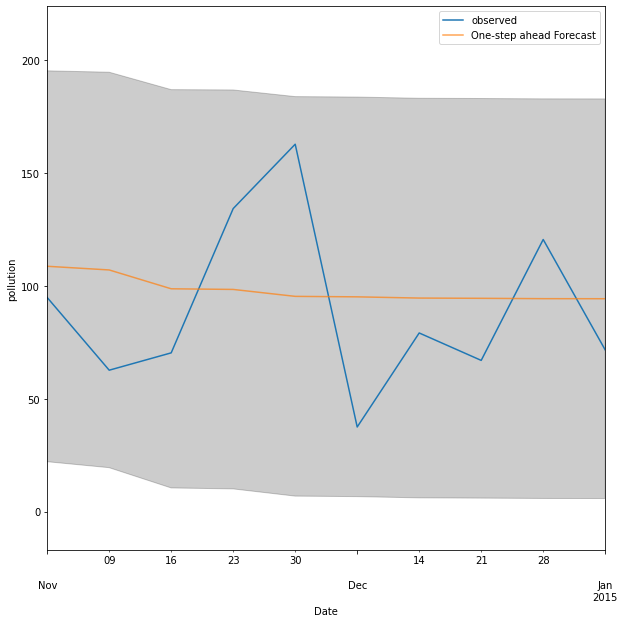

In [23]:
pred = results.get_prediction(start="2014-01",end="2015-1-04", dynamic=False)

pred_ci = pred.conf_int()



# Je ne trace que les observations et les predictions sur des pas de temps inconnus du modele
ax = x[-10:].plot(label='observed')
pred.predicted_mean[-10:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

#### Quantification via RMSE

Calculer le RMSE de cette pr√©diction

In [24]:
from sklearn.metrics import mean_squared_error

# Je calcule l'erreur sur les pas de temps inconnus du modele (evaluation de la qualit√© de prediction)

rms = mean_squared_error(x[-10:], pred.predicted_mean[-10:], squared=False)
rms

37.86017820227261


#### Modifier les parametres (p,d,q), cette fois ci en ne differenciant  pas pas la serie (d=0).

En revenant sur les autocorelogrammes, determiner des nouvelles valeurs de p et q 


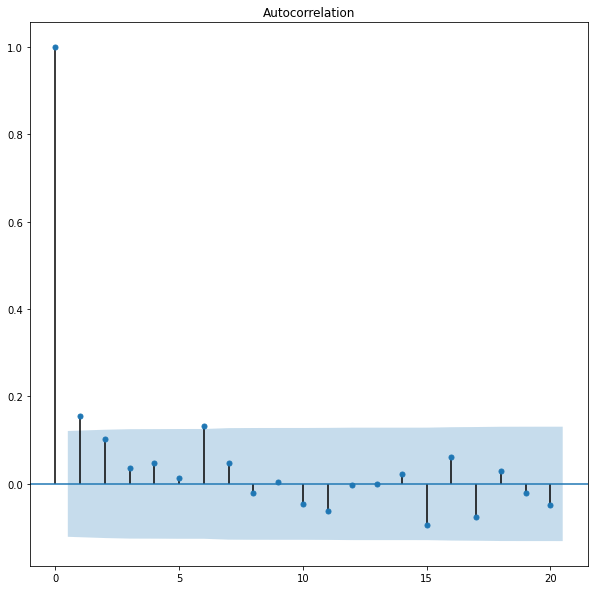

In [25]:
_ =plot_acf(x.dropna(),lags=20)

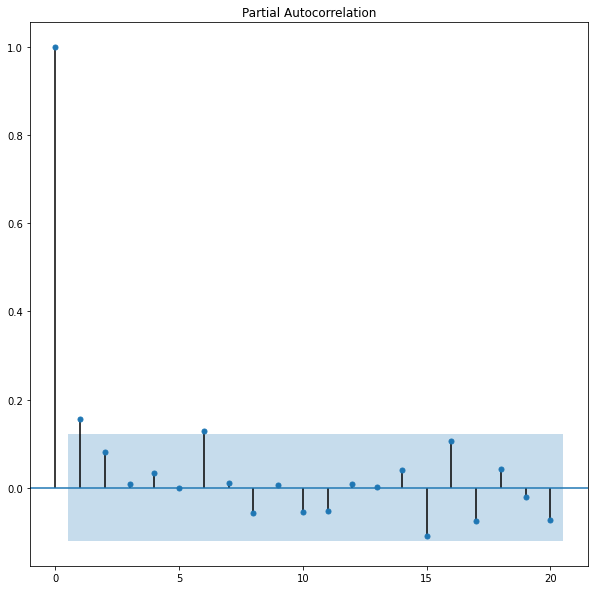

In [26]:
_ =plot_pacf(x.dropna(),lags=20)

#### Caler votre modele ARMA 

In [27]:
import statsmodels.api as sm
x=polution_ts["pollution"].resample('W').mean().dropna()

# J'entraine avec toutes les observations sauf les 10 dernieres (pour evaluer le modele)
mod = sm.tsa.arima.ARIMA(x[:-10].dropna(),
                                order=(1, 0, 1))
results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

                               SARIMAX Results                                
Dep. Variable:              pollution   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1311.316
Date:                Tue, 17 May 2022   AIC                           2630.633
Time:                        12:17:45   BIC                           2644.751
Sample:                    01-03-2010   HQIC                          2636.313
                         - 10-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.3642      5.150     18.324      0.000      84.271     104.457
ar.L1          0.6823      0.201      3.387      0.001       0.287       1.077
ma.L1         -0.5394      0.218     -2.479      0.0

Evaluer qualitativement votre r√©sidu

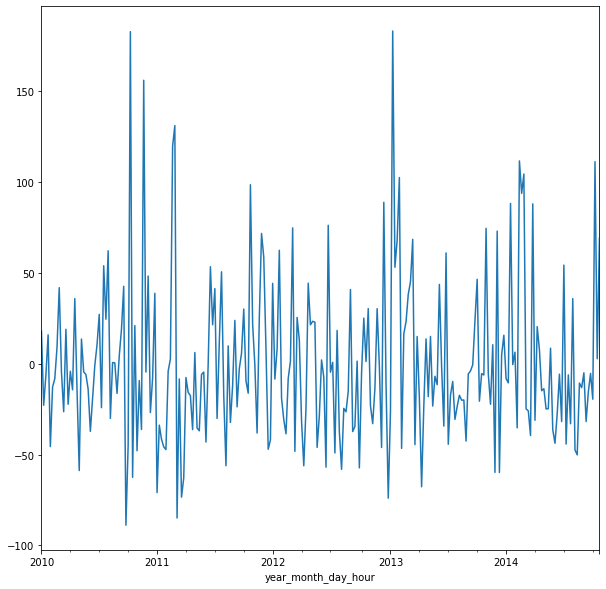

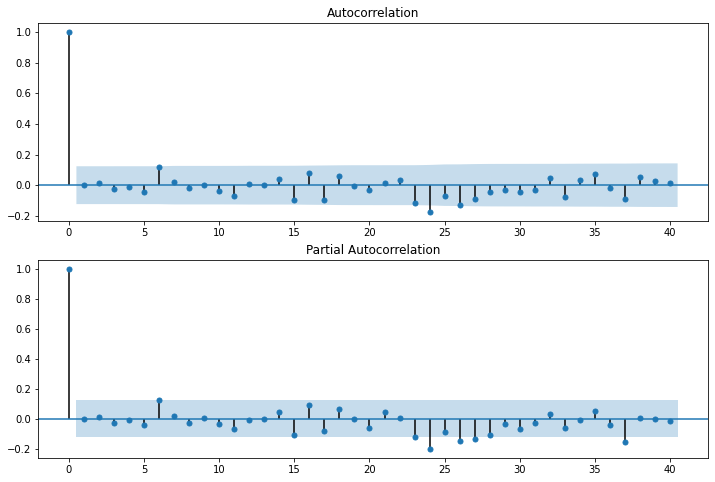

In [28]:
results.resid.plot()

plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

#### Prediction associ√©e

Representez la prediction de ce nouveau modele sur les 10 dernieres observation de la serie

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


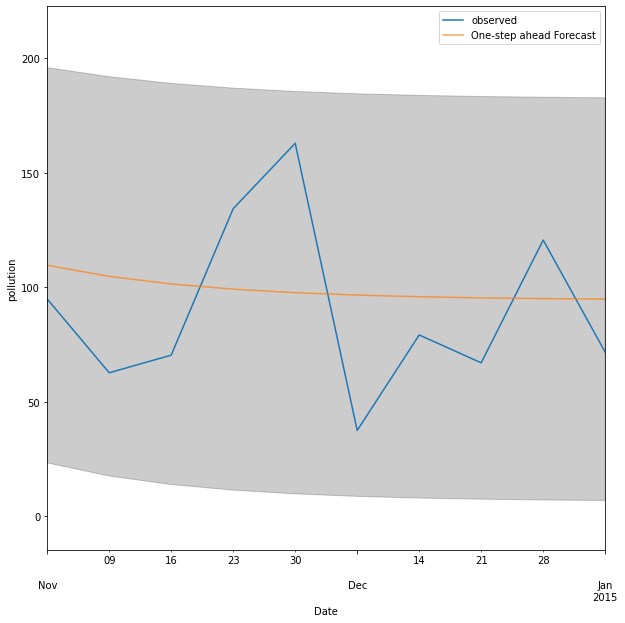

In [29]:
pred = results.get_prediction(start="2014-01",end="2015-1-04", dynamic=False)
pred_ci = pred.conf_int()


# Je ne trace que les observations et les predictions sur des pas de temps inconnus du modele
ax = x[-10:].plot(label='observed')
pred.predicted_mean[-10:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

#### Calculer ce nouveau RMSE

sur l'echantilon d'evaluation (les dix derniers points)

In [30]:
from sklearn.metrics import mean_squared_error

# Je calcule l'erreur sur les pas de temps inconnus du modele (evaluation de la qualit√© de prediction)

rms = mean_squared_error(x[-10:], pred.predicted_mean[-10:], squared=False)
rms

37.68877078127708

### Sarima

![SARMA](Data/1_feNkO5nl2ET5EXZ2vG8mQg.png)

SARIMA: Seasonal ARIMA ou ARIMA saisonnier est une extension du mod√®le ARIMA. 

Le mod√®le ARIMA explor√© ci-dessus ne peut pas capturer efficacement les tendances saisonni√®res de la s√©rie. Pour cela, nous utilisons la classe de mod√®les SARIMA. SARIMA est l'abr√©viation de Seasonal Auto-Regressive Integrated Moving Average model. Un mod√®le SARIMA est sp√©cifi√© comme suit : SARIMA(p, d, q)(P, D, Q, m)

Il permet de mod√©liser les s√©ries temporelles comportant une composante saisonni√®re et d√©sign√© par 7 param√®tres :

#### Param√®tres non saisonniers :

- p (composant AR) : Identique au composant AR dans ARIMA.
- d (composant I) : Identique au composant I dans ARIMA. Indique le nombre de fois qu'une op√©ration de diff√©renciation successive est effectu√©e pour rendre la s√©rie stationnaire.
- q (composant MA) : Identique au composant MA dans ARIMA.

#### Param√®tres saisonniers :
- m (p√©riode saisonni√®re) : indique le nombre de p√©riodes dans la s√©rie apr√®s lesquelles un mod√®le saisonnier se r√©p√®te. Il est courant de voir ce param√®tre √©galement d√©sign√© par la lettre  s.
- P (composante AR saisonni√®re) : ce param√®tre capture l'effet des d√©calages pass√©s sur les observations actuelles. Contrairement √† p , les retards pass√©s sont s√©par√©s du retard actuel par des multiples de m retards. Par exemple, si m =12 et P =2, alors l'observation actuelle est estim√©e √† l'aide des observations du 12√®me d√©calage et du 24√®me d√©calage.
- D (composante saisonni√®re I) : C'est le nombre de fois o√π les diff√©rences saisonni√®res doivent √™tre calcul√©es pour rendre la s√©rie stationnaire. Contrairement √† d , o√π la diff√©renciation a √©t√© faite avec des observations successives (1√®re s√©rie d√©cal√©e), ici la diff√©renciation se fait entre la s√©rie et la m i√®me s√©rie d√©cal√©e.
- Q (composante MA saisonni√®re) : ce param√®tre capture l'effet des r√©sidus pass√©s sur les observations actuelles. Contrairement √† q , les d√©calages pass√©s sont s√©par√©s du d√©calage actuel par des multiples de m d√©calages. Par exemple, si m =12 et Q =2, alors l'observation actuelle est estim√©e √† l'aide des r√©sidus du 12√®me d√©calage et du 24√®me d√©calage.


#### Reprenez votre serie echantillon√©e par semaine avec differenciation

Tracer vos acf et pacf de la serie differenciee d'ordre 1

#### Estimation des param√®tres des mod√®les SARIMA

Les param√®tres du SARIMA(p, d, q)(P, D, Q, m) sont estim√©s en utilisant les directives g√©n√©rales suivantes :

- p : Tracez le trac√© PACF pour la s√©rie et comptez le nombre de retards significatifs.
- d : Le nombre d'op√©rations de diff√©renciation successives n√©cessaires pour convertir la s√©rie en stationnaire.
- q : Tracez le graphique ACF pour la s√©rie et comptez le nombre de retards significatifs.
- m : Le nombre de d√©calages apr√®s lesquels une tendance saisonni√®re est observ√©e.
- P : Tracez √† nouveau le trac√© PACF et observez le nombre de retards significatifs s√©par√©s par des multiples de  m.
- D : Le nombre de diff√©rences saisonni√®res n√©cessaires pour convertir la s√©rie en stationnaire.
- Q : Tracez √† nouveau le trac√© ACF et observez le nombre de retards significatifs s√©par√©s par des multiples de  m.

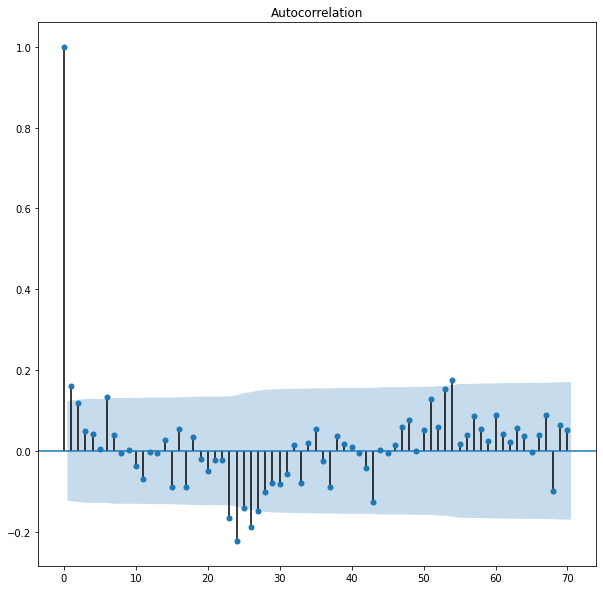

In [47]:

a=plot_acf(polution_ts["pollution"].resample('w').mean().dropna()[:-10],lags=70)

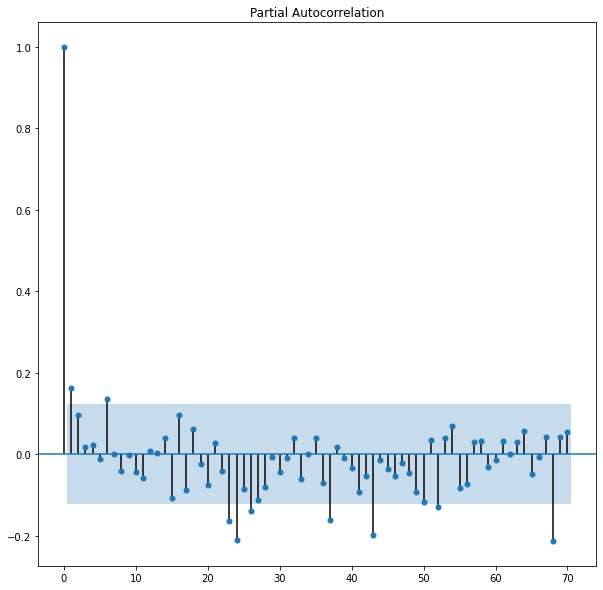

In [48]:
_=plot_pacf(polution_ts["pollution"].resample('w').mean().dropna()[:-10],lags=70)

In [49]:
polution_ts["pollution"].resample('w').mean().dropna()[:-10].diff(26).sum(),polution_ts["pollution"].resample('w').mean().dropna()[:-10].diff(24).sum()

(-124.68750000000011, -90.82440476190465)

On estime en premier lieu un mod√®le SARIMA(5,1,1)(2,1,1)26  au vu des autocorr√©logrammes empiriques simples et partiels. 


Estimation des param√®tres :

p,d,q sont repris du modele ARIMA precedent

- m = 26  : Les observations sont observ√©es par semaines et il y avait pr√©sence d'un motif saisonnier dans la d√©composition de la s√©rie effectu√©e plus haut.
- P = 1 ou 2 : le 26e et 52e d√©calages sont significatif dans le trac√© PACF.
- D = 1  : Une diff√©renciation saisonni√®re effectu√©e.
- Q = 1 : le 26e  d√©calages est significatifs dans le trac√© ACF. Q=1

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(polution_ts["pollution"].resample('w').mean().dropna()[:-10],
                                order=(5, 1, 1),
                                seasonal_order=(1, 1, 1, 26))

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

In [ ]:
results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=12, ax=ax2)
plt.show()

Test prediction model

In [ ]:
pred = results.get_prediction(start="2014-01",end="2015-1-04", dynamic=False)
pred_ci = pred.conf_int()


In [ ]:
ax = polution_ts["pollution"].resample('w').mean()[-20:].plot(label='observed')
pred.predicted_mean[-20:].plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('pollution')
plt.legend()

plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(polution_ts["pollution"].resample('W').mean()[-10:], pred.predicted_mean[-10:], squared=False)
rms

#### Observation du modele sur un horizon plus grand 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


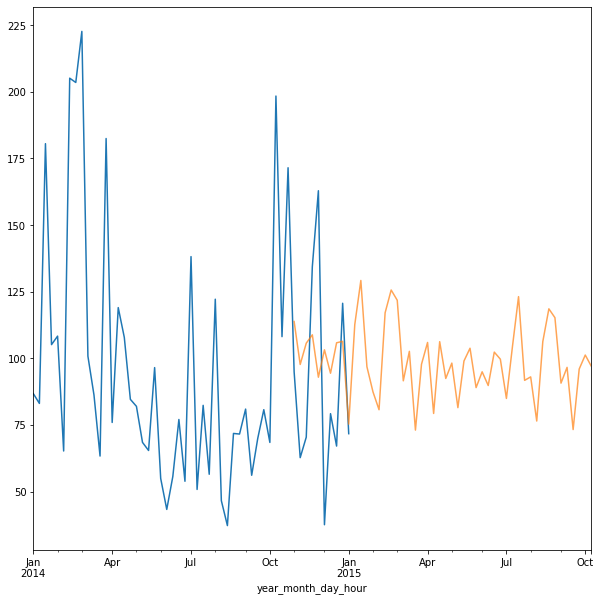

In [39]:
pred = results.predict(start="2014-12",end="2016")

# OU

pred= results.forecast(50)



ax = polution_ts["pollution"].resample('w').mean()['2014':].plot(label='observed')
pred.plot(label='One-step ahead Forecast', alpha=.7)

Avec cette projection, nous observons le comportement de notre modele. Il semble avoir un seuil/niveau plus √©lev√©. Corrigeons le en modifiant le parametre saisonier (m), lui permettant de travailler sur une ann√©e, cett fois ci. 

#### Reprenez ce dernier essai de SARIMA en prenant cette fois ci un m=52 (comme le nombre de semaine de l'ann√©e)  ou en echantilonnant par mois avec cette fois ci m =12

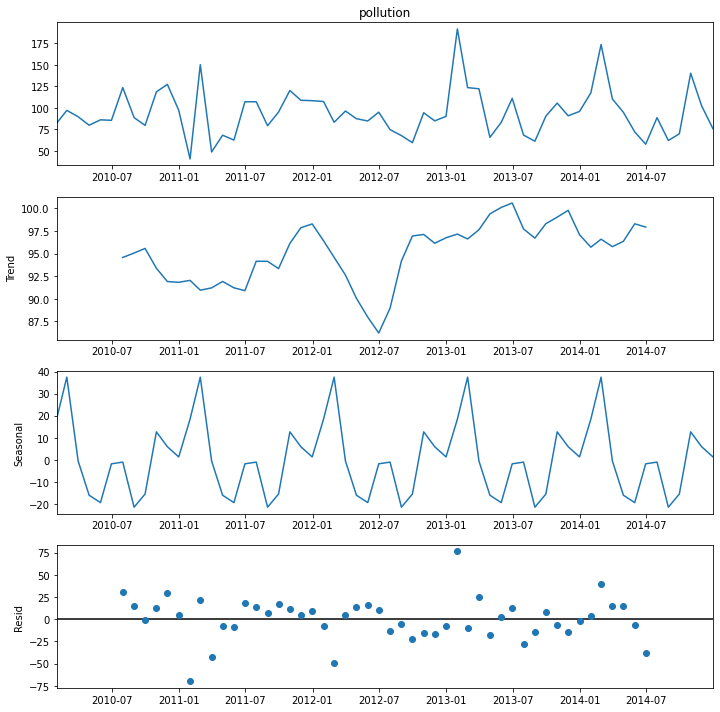

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(10, 10)

x=polution_ts["pollution"].resample('M').mean()

decomp_x = seasonal_decompose(x.fillna(method='ffill'),  model='additive')
decomp_x.plot()

plt.show()

In [41]:

from statsmodels.tsa.stattools import adfuller

x=polution_ts["pollution"].resample('M').mean().diff(1).dropna()

p_value = adfuller(x)[1]

p_value

1.2604401991885106e-06

#### Echantillonnage hebdomadaire

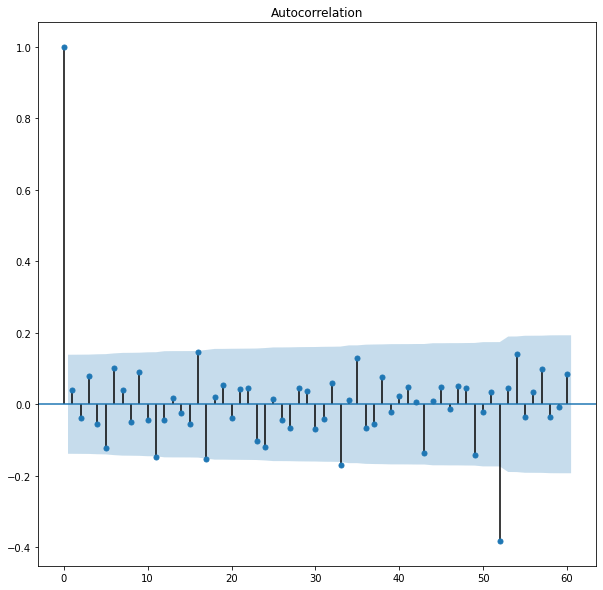

In [42]:
_=plot_acf(polution_ts["pollution"].resample('W').mean().diff(52).dropna()[:-10],lags=60)

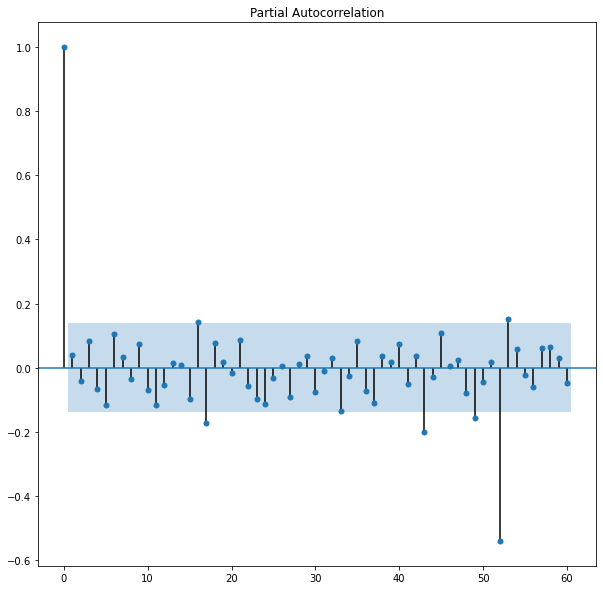

In [43]:
_=plot_pacf(polution_ts["pollution"].resample('W').mean().diff(52).dropna()[:-10],lags=60)

In [44]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(polution_ts["pollution"].resample('W').mean().dropna()[:-10],
                                order=(5, 1, 1),
                                seasonal_order=(2, 1, 2, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[0])
print(results.summary().tables[1])
print(results.summary().tables[2])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                        SARIMAX Results                                        
Dep. Variable:                               pollution   No. Observations:                  252
Model:             SARIMAX(5, 1, 1)x(2, 1, [1, 2], 52)   Log Likelihood                -471.463
Date:                                 Tue, 17 May 2022   AIC                            964.925
Time:                                         12:21:50   BIC                            992.423
Sample:                                     01-03-2010   HQIC                           976.014
                                          - 10-26-2014                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0670      0.175      0.383      0.702      -0.276       0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


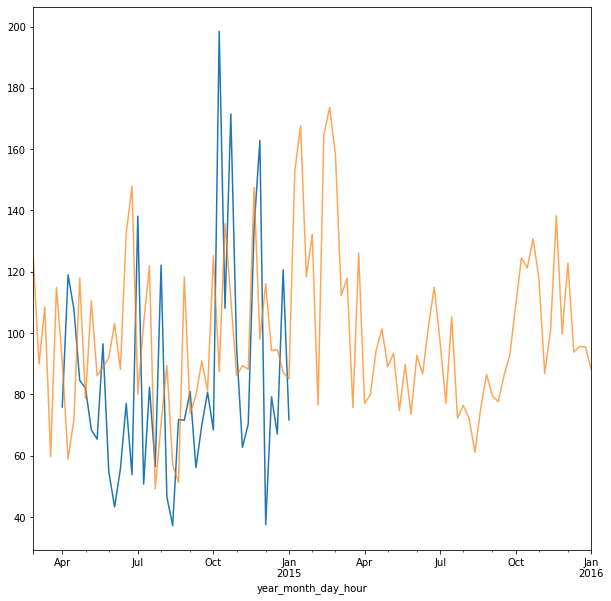

In [45]:
pred = results.predict(start="2014-3",end="2016")

ax = polution_ts["pollution"].resample('W').mean()[-40:].plot(label='observed')
pred.plot( label='One-step ahead Forecast', alpha=.7)

#### Pour retrouver une des meilleurs combinaisons de parametre nous pouvons simuler nombre d'entre elles et trouver celle qui minimise la metric AIC

Mais √ßa peut etre tres long ....

In [46]:
import itertools
import warnings
from tqdm import tqdm

x=polution_ts["pollution"].resample('W').mean()

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



warnings.filterwarnings("ignore") # specify to ignore warning messages
maxi=1000
for param in tqdm(pdq):
    for param_seasonal in tqdm(seasonal_pdq):
        try:
            mod = sm.tsa.statespace.SARIMAX(x,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('########################################')
            print('ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('########################################')
            if results.aic < maxi:
                combi='ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic)
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


  7%|‚ñã         | 2/27 [00:00<00:01, 15.14it/s]

########################################
ARIMA(0, 0, 0)x(0, 0, 0, 6)6 - AIC:3167.074647894815
########################################
########################################
ARIMA(0, 0, 0)x(0, 0, 1, 6)6 - AIC:2942.5433088276627
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:01, 12.31it/s]

########################################
ARIMA(0, 0, 0)x(0, 0, 2, 6)6 - AIC:2840.0660336851215
########################################
########################################
ARIMA(0, 0, 0)x(0, 1, 0, 6)6 - AIC:2805.523511296273
########################################
########################################
ARIMA(0, 0, 0)x(0, 1, 1, 6)6 - AIC:2629.1721840367322
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:00<00:02,  7.17it/s]

########################################
ARIMA(0, 0, 0)x(0, 1, 2, 6)6 - AIC:2565.8122348113193
########################################
########################################
ARIMA(0, 0, 0)x(0, 2, 0, 6)6 - AIC:3000.402395045685
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:02,  7.21it/s]

########################################
ARIMA(0, 0, 0)x(0, 2, 1, 6)6 - AIC:2701.2955818081464
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:01<00:04,  3.78it/s]

########################################
ARIMA(0, 0, 0)x(0, 2, 2, 6)6 - AIC:2547.6908154989005
########################################
########################################
ARIMA(0, 0, 0)x(1, 0, 0, 6)6 - AIC:2797.0726841255755
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:01<00:03,  4.71it/s]

########################################
ARIMA(0, 0, 0)x(1, 0, 1, 6)6 - AIC:2693.213941023981
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:02<00:03,  4.12it/s]

########################################
ARIMA(0, 0, 0)x(1, 0, 2, 6)6 - AIC:2630.900839611111
########################################
########################################
ARIMA(0, 0, 0)x(1, 1, 0, 6)6 - AIC:2708.3803874380565
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:02<00:02,  5.09it/s]

########################################
ARIMA(0, 0, 0)x(1, 1, 1, 6)6 - AIC:2628.8743562754535
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:03<00:03,  3.97it/s]

########################################
ARIMA(0, 0, 0)x(1, 1, 2, 6)6 - AIC:2564.3045040688603
########################################
########################################
ARIMA(0, 0, 0)x(1, 2, 0, 6)6 - AIC:2831.5479547633663
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:03<00:02,  4.47it/s]

########################################
ARIMA(0, 0, 0)x(1, 2, 1, 6)6 - AIC:2661.7091615750023
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:04<00:03,  2.37it/s]

########################################
ARIMA(0, 0, 0)x(1, 2, 2, 6)6 - AIC:2547.8868271036854
########################################
########################################
ARIMA(0, 0, 0)x(2, 0, 0, 6)6 - AIC:2701.3676521445586
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:04<00:02,  2.93it/s]

########################################
ARIMA(0, 0, 0)x(2, 0, 1, 6)6 - AIC:2642.116766275578
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:05<00:02,  2.53it/s]

########################################
ARIMA(0, 0, 0)x(2, 0, 2, 6)6 - AIC:2627.6334548695995
########################################
########################################
ARIMA(0, 0, 0)x(2, 1, 0, 6)6 - AIC:2619.731439665823
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:06<00:01,  2.96it/s]

########################################
ARIMA(0, 0, 0)x(2, 1, 1, 6)6 - AIC:2578.3219585937723
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:06<00:00,  3.16it/s]

########################################
ARIMA(0, 0, 0)x(2, 1, 2, 6)6 - AIC:2566.1427175344033
########################################
########################################
ARIMA(0, 0, 0)x(2, 2, 0, 6)6 - AIC:2673.572416347083
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:07<00:00,  2.79it/s]

########################################
ARIMA(0, 0, 0)x(2, 2, 1, 6)6 - AIC:2584.914839766824
########################################



  4%|‚ñé         | 1/27 [00:08<03:35,  8.29s/it]

########################################
ARIMA(0, 0, 0)x(2, 2, 2, 6)6 - AIC:2548.4378037110155
########################################



  7%|‚ñã         | 2/27 [00:00<00:01, 12.84it/s]

########################################
ARIMA(0, 0, 1)x(0, 0, 0, 6)6 - AIC:3013.3725469295796
########################################
########################################
ARIMA(0, 0, 1)x(0, 0, 1, 6)6 - AIC:2863.784750023011
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:02,  9.48it/s]

########################################
ARIMA(0, 0, 1)x(0, 0, 2, 6)6 - AIC:2777.3510817057468
########################################
########################################
ARIMA(0, 0, 1)x(0, 1, 0, 6)6 - AIC:2792.8810686180614
########################################
########################################
ARIMA(0, 0, 1)x(0, 1, 1, 6)6 - AIC:2616.0105290326155
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:00<00:03,  5.41it/s]

########################################
ARIMA(0, 0, 1)x(0, 1, 2, 6)6 - AIC:2553.23696303586
########################################
########################################
ARIMA(0, 0, 1)x(0, 2, 0, 6)6 - AIC:2987.236659695117
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:03,  5.66it/s]

########################################
ARIMA(0, 0, 1)x(0, 2, 1, 6)6 - AIC:2688.3343555026004
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:02<00:06,  2.70it/s]

########################################
ARIMA(0, 0, 1)x(0, 2, 2, 6)6 - AIC:2533.360146716075
########################################
########################################
ARIMA(0, 0, 1)x(1, 0, 0, 6)6 - AIC:2789.2732130378536
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:02<00:04,  3.50it/s]

########################################
ARIMA(0, 0, 1)x(1, 0, 1, 6)6 - AIC:2679.8278151622126
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:03<00:05,  2.91it/s]

########################################
ARIMA(0, 0, 1)x(1, 0, 2, 6)6 - AIC:2618.6023357409567
########################################
########################################
ARIMA(0, 0, 1)x(1, 1, 0, 6)6 - AIC:2704.492901293357
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:03<00:03,  3.51it/s]

########################################
ARIMA(0, 0, 1)x(1, 1, 1, 6)6 - AIC:2615.931387401024
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:04<00:02,  3.68it/s]

########################################
ARIMA(0, 0, 1)x(1, 1, 2, 6)6 - AIC:2551.5556278245176
########################################
########################################
ARIMA(0, 0, 1)x(1, 2, 0, 6)6 - AIC:2828.643873803252
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:04<00:02,  3.37it/s]

########################################
ARIMA(0, 0, 1)x(1, 2, 1, 6)6 - AIC:2647.5117159925267
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:06<00:03,  2.14it/s]

########################################
ARIMA(0, 0, 1)x(1, 2, 2, 6)6 - AIC:2533.485681347973
########################################
########################################
ARIMA(0, 0, 1)x(2, 0, 0, 6)6 - AIC:2695.0495191398886
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:06<00:03,  2.02it/s]

########################################
ARIMA(0, 0, 1)x(2, 0, 1, 6)6 - AIC:2639.110484924692
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:07<00:02,  2.10it/s]

########################################
ARIMA(0, 0, 1)x(2, 0, 2, 6)6 - AIC:2614.987842924076
########################################
########################################
ARIMA(0, 0, 1)x(2, 1, 0, 6)6 - AIC:2614.363449896169
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:08<00:01,  2.05it/s]

########################################
ARIMA(0, 0, 1)x(2, 1, 1, 6)6 - AIC:2575.3225368870044
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:08<00:01,  1.83it/s]


########################################
ARIMA(0, 0, 1)x(2, 1, 2, 6)6 - AIC:2553.418384609591
########################################
########################################
ARIMA(0, 0, 1)x(2, 2, 0, 6)6 - AIC:2671.139988897924
########################################


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:09<00:00,  1.99it/s]

########################################
ARIMA(0, 0, 1)x(2, 2, 1, 6)6 - AIC:2579.7834082749005
########################################



  7%|‚ñã         | 2/27 [00:19<04:08,  9.94s/it]

########################################
ARIMA(0, 0, 1)x(2, 2, 2, 6)6 - AIC:2534.5715979938345
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 0, 2)x(0, 0, 0, 6)6 - AIC:2931.6061509414385
########################################



  7%|‚ñã         | 2/27 [00:00<00:02,  9.66it/s]

########################################
ARIMA(0, 0, 2)x(0, 0, 1, 6)6 - AIC:2801.8650974164475
########################################



 11%|‚ñà         | 3/27 [00:00<00:04,  5.86it/s]

########################################
ARIMA(0, 0, 2)x(0, 0, 2, 6)6 - AIC:2728.8105923366265
########################################
########################################
ARIMA(0, 0, 2)x(0, 1, 0, 6)6 - AIC:2781.4609404737103
########################################



 19%|‚ñà‚ñä        | 5/27 [00:00<00:04,  5.37it/s]

########################################
ARIMA(0, 0, 2)x(0, 1, 1, 6)6 - AIC:2606.082164047709
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:01<00:04,  4.57it/s]

########################################
ARIMA(0, 0, 2)x(0, 1, 2, 6)6 - AIC:2543.04149258671
########################################
########################################
ARIMA(0, 0, 2)x(0, 2, 0, 6)6 - AIC:2974.276343637959
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:05,  3.30it/s]

########################################
ARIMA(0, 0, 2)x(0, 2, 1, 6)6 - AIC:2676.803775589816
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:03<00:06,  2.58it/s]

########################################
ARIMA(0, 0, 2)x(0, 2, 2, 6)6 - AIC:2523.9608983526505
########################################
########################################
ARIMA(0, 0, 2)x(1, 0, 0, 6)6 - AIC:2782.0853345274036
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:03<00:05,  2.81it/s]

########################################
ARIMA(0, 0, 2)x(1, 0, 1, 6)6 - AIC:2670.053486549999
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:04<00:05,  2.58it/s]

########################################
ARIMA(0, 0, 2)x(1, 0, 2, 6)6 - AIC:2607.505270819097
########################################
########################################
ARIMA(0, 0, 2)x(1, 1, 0, 6)6 - AIC:2703.974265247184
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:04<00:05,  2.54it/s]

########################################
ARIMA(0, 0, 2)x(1, 1, 1, 6)6 - AIC:2604.9522638775015
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:05<00:04,  2.73it/s]

########################################
ARIMA(0, 0, 2)x(1, 1, 2, 6)6 - AIC:2541.5377463907553
########################################
########################################
ARIMA(0, 0, 2)x(1, 2, 0, 6)6 - AIC:2827.6137568643
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:05<00:04,  2.44it/s]

########################################
ARIMA(0, 0, 2)x(1, 2, 1, 6)6 - AIC:2636.704673558671
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:07<00:04,  1.83it/s]

########################################
ARIMA(0, 0, 2)x(1, 2, 2, 6)6 - AIC:2523.3666546957834
########################################
########################################
ARIMA(0, 0, 2)x(2, 0, 0, 6)6 - AIC:2692.355326667256
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:08<00:03,  1.78it/s]

########################################
ARIMA(0, 0, 2)x(2, 0, 1, 6)6 - AIC:2638.708882506934
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:09<00:02,  1.74it/s]

########################################
ARIMA(0, 0, 2)x(2, 0, 2, 6)6 - AIC:2605.1032961818664
########################################
########################################
ARIMA(0, 0, 2)x(2, 1, 0, 6)6 - AIC:2614.1149571012816
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:10<00:02,  1.72it/s]

########################################
ARIMA(0, 0, 2)x(2, 1, 1, 6)6 - AIC:2574.6734408390566
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:10<00:02,  1.49it/s]

########################################
ARIMA(0, 0, 2)x(2, 1, 2, 6)6 - AIC:2543.312060883892
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:11<00:01,  1.79it/s]

########################################
ARIMA(0, 0, 2)x(2, 2, 0, 6)6 - AIC:2672.324192765226
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:12<00:00,  1.57it/s]

########################################
ARIMA(0, 0, 2)x(2, 2, 1, 6)6 - AIC:2579.5697414451697
########################################



 11%|‚ñà         | 3/27 [00:33<04:42, 11.77s/it]

########################################
ARIMA(0, 0, 2)x(2, 2, 2, 6)6 - AIC:2524.5854028037184
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 1, 0)x(0, 0, 0, 6)6 - AIC:2851.9005809638265
########################################
########################################
ARIMA(0, 1, 0)x(0, 0, 1, 6)6 - AIC:2789.087675181558
########################################


########################################
ARIMA(0, 1, 0)x(0, 0, 2, 6)6 - AIC:2728.8353765442016
########################################


 19%|‚ñà‚ñä        | 5/27 [00:00<00:01, 11.60it/s]

########################################
ARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:2931.159580273539
########################################
########################################
ARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:2745.4621524330955
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:00<00:02,  8.76it/s]

########################################
ARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:2680.644015244706
########################################
########################################
ARIMA(0, 1, 0)x(0, 2, 0, 6)6 - AIC:3124.1530273164
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:00<00:02,  7.15it/s]

########################################
ARIMA(0, 1, 0)x(0, 2, 1, 6)6 - AIC:2819.147077786628
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:01<00:02,  5.50it/s]

########################################
ARIMA(0, 1, 0)x(0, 2, 2, 6)6 - AIC:2653.237683320703
########################################
########################################
ARIMA(0, 1, 0)x(1, 0, 0, 6)6 - AIC:2798.9539695556477
########################################
########################################
ARIMA(0, 1, 0)x(1, 0, 1, 6)6 - AIC:2790.6194032137273
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:02<00:03,  4.65it/s]

########################################
ARIMA(0, 1, 0)x(1, 0, 2, 6)6 - AIC:2728.7472126286007
########################################
########################################
ARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:2823.919454572047
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:02<00:02,  5.22it/s]

########################################
ARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:2746.7198980142
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:02<00:02,  4.28it/s]

########################################
ARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:2680.2994433229023
########################################
########################################
ARIMA(0, 1, 0)x(1, 2, 0, 6)6 - AIC:2946.8880305734506
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:03<00:02,  4.72it/s]

########################################
ARIMA(0, 1, 0)x(1, 2, 1, 6)6 - AIC:2773.239641345424
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:04<00:03,  2.78it/s]

########################################
ARIMA(0, 1, 0)x(1, 2, 2, 6)6 - AIC:2654.21158878638
########################################
########################################
ARIMA(0, 1, 0)x(2, 0, 0, 6)6 - AIC:2739.077470174974
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:04<00:02,  3.43it/s]

########################################
ARIMA(0, 1, 0)x(2, 0, 1, 6)6 - AIC:2739.115494594488
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:04<00:01,  3.43it/s]

########################################
ARIMA(0, 1, 0)x(2, 0, 2, 6)6 - AIC:2729.631671412206
########################################
########################################
ARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:2726.8657564163914
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:05<00:01,  3.63it/s]

########################################
ARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:2693.221518360793
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:05<00:00,  3.47it/s]

########################################
ARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:2682.1630953591184
########################################
########################################
ARIMA(0, 1, 0)x(2, 2, 0, 6)6 - AIC:2789.6490626711
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:06<00:00,  2.83it/s]

########################################
ARIMA(0, 1, 0)x(2, 2, 1, 6)6 - AIC:2688.990159285555
########################################



 15%|‚ñà‚ñç        | 4/27 [00:41<03:56, 10.27s/it]

########################################
ARIMA(0, 1, 0)x(2, 2, 2, 6)6 - AIC:2655.680329941889
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(0, 1, 1)x(0, 0, 0, 6)6 - AIC:2715.6427006047634
########################################



  7%|‚ñã         | 2/27 [00:00<00:02,  8.93it/s]

########################################
ARIMA(0, 1, 1)x(0, 0, 1, 6)6 - AIC:2651.8073194103617
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:03,  5.94it/s]

########################################
ARIMA(0, 1, 1)x(0, 0, 2, 6)6 - AIC:2595.358601194088
########################################
########################################
ARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:2791.3174119796163
########################################



 19%|‚ñà‚ñä        | 5/27 [00:00<00:04,  4.85it/s]

########################################
ARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:2618.403839317414
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:06,  3.45it/s]

########################################
ARIMA(0, 1, 1)x(0, 1, 2, 6)6 - AIC:2557.895773098896
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:01<00:05,  3.78it/s]

########################################
ARIMA(0, 1, 1)x(0, 2, 0, 6)6 - AIC:2983.913734287151
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:02<00:06,  2.88it/s]

########################################
ARIMA(0, 1, 1)x(0, 2, 1, 6)6 - AIC:2690.9677659157774
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:03<00:07,  2.23it/s]

########################################
ARIMA(0, 1, 1)x(0, 2, 2, 6)6 - AIC:2536.111241324913
########################################
########################################
ARIMA(0, 1, 1)x(1, 0, 0, 6)6 - AIC:2672.054617188044
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:03<00:06,  2.33it/s]

########################################
ARIMA(0, 1, 1)x(1, 0, 1, 6)6 - AIC:2652.273556615748
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:04<00:05,  2.50it/s]

########################################
ARIMA(0, 1, 1)x(1, 0, 2, 6)6 - AIC:2594.7031981608197
########################################
########################################
ARIMA(0, 1, 1)x(1, 1, 0, 6)6 - AIC:2705.917797171869
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:05<00:05,  2.38it/s]

########################################
ARIMA(0, 1, 1)x(1, 1, 1, 6)6 - AIC:2620.0534091780683
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:05<00:06,  1.87it/s]

########################################
ARIMA(0, 1, 1)x(1, 1, 2, 6)6 - AIC:2553.802494586924
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:06<00:05,  1.94it/s]

########################################
ARIMA(0, 1, 1)x(1, 2, 0, 6)6 - AIC:2828.100766574509
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:06<00:05,  1.91it/s]

########################################
ARIMA(0, 1, 1)x(1, 2, 1, 6)6 - AIC:2652.437487603298
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:08<00:08,  1.07it/s]

########################################
ARIMA(0, 1, 1)x(1, 2, 2, 6)6 - AIC:2537.810318123473
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:09<00:05,  1.35it/s]

########################################
ARIMA(0, 1, 1)x(2, 0, 0, 6)6 - AIC:2615.240011151308
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:09<00:04,  1.51it/s]

########################################
ARIMA(0, 1, 1)x(2, 0, 1, 6)6 - AIC:2613.9517967543734
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:10<00:03,  1.58it/s]

########################################
ARIMA(0, 1, 1)x(2, 0, 2, 6)6 - AIC:2596.12149567175
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:10<00:02,  1.96it/s]

########################################
ARIMA(0, 1, 1)x(2, 1, 0, 6)6 - AIC:2618.609904763386
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:11<00:02,  1.75it/s]

########################################
ARIMA(0, 1, 1)x(2, 1, 1, 6)6 - AIC:2579.818608927252
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:12<00:02,  1.36it/s]

########################################
ARIMA(0, 1, 1)x(2, 1, 2, 6)6 - AIC:2556.712140634296
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:13<00:01,  1.02it/s]

########################################
ARIMA(0, 1, 1)x(2, 2, 0, 6)6 - AIC:2670.788786809803
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:14<00:00,  1.04it/s]

########################################
ARIMA(0, 1, 1)x(2, 2, 1, 6)6 - AIC:2584.4166219237836
########################################



 19%|‚ñà‚ñä        | 5/27 [00:57<04:36, 12.58s/it]

########################################
ARIMA(0, 1, 1)x(2, 2, 2, 6)6 - AIC:2539.18066428398
########################################



  4%|‚ñé         | 1/27 [00:00<00:02,  9.42it/s]

########################################
ARIMA(0, 1, 2)x(0, 0, 0, 6)6 - AIC:2700.1236155975294
########################################



  7%|‚ñã         | 2/27 [00:00<00:04,  6.01it/s]

########################################
ARIMA(0, 1, 2)x(0, 0, 1, 6)6 - AIC:2639.2216914422324
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:04,  4.60it/s]

########################################
ARIMA(0, 1, 2)x(0, 0, 2, 6)6 - AIC:2582.346456763302
########################################
########################################
ARIMA(0, 1, 2)x(0, 1, 0, 6)6 - AIC:2778.3657660030703
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:05,  4.02it/s]

########################################
ARIMA(0, 1, 2)x(0, 1, 1, 6)6 - AIC:2606.0732046209932
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:08,  2.58it/s]

########################################
ARIMA(0, 1, 2)x(0, 1, 2, 6)6 - AIC:2544.020003690787
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:02<00:07,  2.71it/s]

########################################
ARIMA(0, 1, 2)x(0, 2, 0, 6)6 - AIC:2969.9500055199114
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:02<00:08,  2.32it/s]

########################################
ARIMA(0, 1, 2)x(0, 2, 1, 6)6 - AIC:2677.3419063535935
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:03<00:08,  2.04it/s]

########################################
ARIMA(0, 1, 2)x(0, 2, 2, 6)6 - AIC:2525.9742791160857
########################################
########################################
ARIMA(0, 1, 2)x(1, 0, 0, 6)6 - AIC:2668.7921662429867
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:04<00:07,  2.15it/s]

########################################
ARIMA(0, 1, 2)x(1, 0, 1, 6)6 - AIC:2639.8248133141483
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:04<00:07,  1.98it/s]

########################################
ARIMA(0, 1, 2)x(1, 0, 2, 6)6 - AIC:2581.7859506782224
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:05<00:06,  2.22it/s]

########################################
ARIMA(0, 1, 2)x(1, 1, 0, 6)6 - AIC:2701.824330201971
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:05<00:06,  2.13it/s]

########################################
ARIMA(0, 1, 2)x(1, 1, 1, 6)6 - AIC:2606.3348369589994
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:06<00:07,  1.66it/s]

########################################
ARIMA(0, 1, 2)x(1, 1, 2, 6)6 - AIC:2541.034785539498
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:07<00:06,  1.61it/s]

########################################
ARIMA(0, 1, 2)x(1, 2, 0, 6)6 - AIC:2825.0132014533433
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:07<00:06,  1.59it/s]

########################################
ARIMA(0, 1, 2)x(1, 2, 1, 6)6 - AIC:2637.448492607103
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:10<00:09,  1.09s/it]

########################################
ARIMA(0, 1, 2)x(1, 2, 2, 6)6 - AIC:2526.709919127401
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:10<00:06,  1.15it/s]

########################################
ARIMA(0, 1, 2)x(2, 0, 0, 6)6 - AIC:2612.132112869576
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:11<00:05,  1.31it/s]

########################################
ARIMA(0, 1, 2)x(2, 0, 1, 6)6 - AIC:2610.807117524936
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:11<00:04,  1.30it/s]

########################################
ARIMA(0, 1, 2)x(2, 0, 2, 6)6 - AIC:2583.139303112474
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:12<00:03,  1.44it/s]

########################################
ARIMA(0, 1, 2)x(2, 1, 0, 6)6 - AIC:2611.7807052945172
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:13<00:03,  1.30it/s]

########################################
ARIMA(0, 1, 2)x(2, 1, 1, 6)6 - AIC:2575.7812935820075
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:14<00:02,  1.11it/s]

########################################
ARIMA(0, 1, 2)x(2, 1, 2, 6)6 - AIC:2543.0272412421664
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:15<00:01,  1.07it/s]

########################################
ARIMA(0, 1, 2)x(2, 2, 0, 6)6 - AIC:2668.14021425177
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:16<00:01,  1.04s/it]

########################################
ARIMA(0, 1, 2)x(2, 2, 1, 6)6 - AIC:2581.8144891036773
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [01:17<05:11, 14.85s/it]

########################################
ARIMA(0, 1, 2)x(2, 2, 2, 6)6 - AIC:2527.8622021728684
########################################



  7%|‚ñã         | 2/27 [00:00<00:01, 17.94it/s]

########################################
ARIMA(0, 2, 0)x(0, 0, 0, 6)6 - AIC:3120.5976267473643
########################################
########################################
ARIMA(0, 2, 0)x(0, 0, 1, 6)6 - AIC:3051.69924325968
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:01, 13.63it/s]

########################################
ARIMA(0, 2, 0)x(0, 0, 2, 6)6 - AIC:2984.9594534935054
########################################
########################################
ARIMA(0, 2, 0)x(0, 1, 0, 6)6 - AIC:3194.1585678802485
########################################
########################################
ARIMA(0, 2, 0)x(0, 1, 1, 6)6 - AIC:2999.709367994761
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:00<00:03,  6.38it/s]

########################################
ARIMA(0, 2, 0)x(0, 1, 2, 6)6 - AIC:2928.403341244486
########################################
########################################
ARIMA(0, 2, 0)x(0, 2, 0, 6)6 - AIC:3381.079087354042
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:03,  6.25it/s]

########################################
ARIMA(0, 2, 0)x(0, 2, 1, 6)6 - AIC:3068.945376637618
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:02<00:03,  4.84it/s]

########################################
ARIMA(0, 2, 0)x(0, 2, 2, 6)6 - AIC:2893.0916272971663
########################################
########################################
ARIMA(0, 2, 0)x(1, 0, 0, 6)6 - AIC:3062.4514879796234
########################################
########################################
ARIMA(0, 2, 0)x(1, 0, 1, 6)6 - AIC:3052.9382177955176
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:02<00:03,  4.16it/s]

########################################
ARIMA(0, 2, 0)x(1, 0, 2, 6)6 - AIC:2984.068423041216
########################################
########################################
ARIMA(0, 2, 0)x(1, 1, 0, 6)6 - AIC:3078.0556711374325
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:02<00:02,  4.59it/s]

########################################
ARIMA(0, 2, 0)x(1, 1, 1, 6)6 - AIC:3000.995667534561
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:03<00:03,  3.37it/s]

########################################
ARIMA(0, 2, 0)x(1, 1, 2, 6)6 - AIC:2928.4251328677046
########################################
########################################
ARIMA(0, 2, 0)x(1, 2, 0, 6)6 - AIC:3196.3021093225834
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:03<00:02,  3.75it/s]

########################################
ARIMA(0, 2, 0)x(1, 2, 1, 6)6 - AIC:3018.7421780399936
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:05<00:02,  3.06it/s]

########################################
ARIMA(0, 2, 0)x(1, 2, 2, 6)6 - AIC:2893.9734913194106
########################################
########################################
ARIMA(0, 2, 0)x(2, 0, 0, 6)6 - AIC:2996.0107189286146
########################################
########################################
ARIMA(0, 2, 0)x(2, 0, 1, 6)6 - AIC:2998.00990584909
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:05<00:02,  2.78it/s]

########################################
ARIMA(0, 2, 0)x(2, 0, 2, 6)6 - AIC:2985.068855279278
########################################
########################################
ARIMA(0, 2, 0)x(2, 1, 0, 6)6 - AIC:2973.011222617324
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:06<00:01,  3.06it/s]

########################################
ARIMA(0, 2, 0)x(2, 1, 1, 6)6 - AIC:2941.7208360736686
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:06<00:00,  3.03it/s]

########################################
ARIMA(0, 2, 0)x(2, 1, 2, 6)6 - AIC:2930.0447069137217
########################################
########################################
ARIMA(0, 2, 0)x(2, 2, 0, 6)6 - AIC:3029.4494090367325
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:07<00:00,  2.36it/s]

########################################
ARIMA(0, 2, 0)x(2, 2, 1, 6)6 - AIC:2928.224710496947
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [01:26<04:19, 12.97s/it]

########################################
ARIMA(0, 2, 0)x(2, 2, 2, 6)6 - AIC:2895.8507769190737
########################################



  4%|‚ñé         | 1/27 [00:00<00:03,  8.06it/s]

########################################
ARIMA(0, 2, 1)x(0, 0, 0, 6)6 - AIC:2838.2519486547444
########################################



  7%|‚ñã         | 2/27 [00:00<00:05,  4.42it/s]

########################################
ARIMA(0, 2, 1)x(0, 0, 1, 6)6 - AIC:2774.5469401896307
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:05,  4.29it/s]

########################################
ARIMA(0, 2, 1)x(0, 0, 2, 6)6 - AIC:2714.587051439592
########################################
########################################
ARIMA(0, 2, 1)x(0, 1, 0, 6)6 - AIC:2915.8219494128034
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:05,  3.86it/s]

########################################
ARIMA(0, 2, 1)x(0, 1, 1, 6)6 - AIC:2733.738653892593
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:08,  2.55it/s]

########################################
ARIMA(0, 2, 1)x(0, 1, 2, 6)6 - AIC:2669.6869962894725
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:02<00:06,  2.87it/s]

########################################
ARIMA(0, 2, 1)x(0, 2, 0, 6)6 - AIC:3105.777038427919
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:02<00:07,  2.61it/s]

########################################
ARIMA(0, 2, 1)x(0, 2, 1, 6)6 - AIC:2807.323992927725
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:03<00:08,  2.03it/s]

########################################
ARIMA(0, 2, 1)x(0, 2, 2, 6)6 - AIC:2644.6134103641425
########################################
########################################
ARIMA(0, 2, 1)x(1, 0, 0, 6)6 - AIC:2796.1121954749715
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:04<00:06,  2.30it/s]

########################################
ARIMA(0, 2, 1)x(1, 0, 1, 6)6 - AIC:2776.4885535714775
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:04<00:07,  2.09it/s]

########################################
ARIMA(0, 2, 1)x(1, 0, 2, 6)6 - AIC:2713.803397674902
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:05<00:05,  2.52it/s]

########################################
ARIMA(0, 2, 1)x(1, 1, 0, 6)6 - AIC:2820.9248295309662
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:05<00:05,  2.46it/s]

########################################
ARIMA(0, 2, 1)x(1, 1, 1, 6)6 - AIC:2735.5504500472084
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:06<00:06,  1.98it/s]

########################################
ARIMA(0, 2, 1)x(1, 1, 2, 6)6 - AIC:2668.3441769622727
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:06<00:05,  2.03it/s]

########################################
ARIMA(0, 2, 1)x(1, 2, 0, 6)6 - AIC:2942.8751953940505
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:07<00:05,  1.77it/s]

########################################
ARIMA(0, 2, 1)x(1, 2, 1, 6)6 - AIC:2762.5256824941775
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:09<00:08,  1.09it/s]

########################################
ARIMA(0, 2, 1)x(1, 2, 2, 6)6 - AIC:2646.33057100719
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:09<00:06,  1.30it/s]

########################################
ARIMA(0, 2, 1)x(2, 0, 0, 6)6 - AIC:2735.5255386659287
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:10<00:05,  1.40it/s]

########################################
ARIMA(0, 2, 1)x(2, 0, 1, 6)6 - AIC:2735.5427178731497
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:10<00:04,  1.34it/s]

########################################
ARIMA(0, 2, 1)x(2, 0, 2, 6)6 - AIC:2715.3919133458003
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:11<00:03,  1.51it/s]

########################################
ARIMA(0, 2, 1)x(2, 1, 0, 6)6 - AIC:2724.0006836704633
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:12<00:02,  1.42it/s]

########################################
ARIMA(0, 2, 1)x(2, 1, 1, 6)6 - AIC:2692.541605114566
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:13<00:02,  1.21it/s]

########################################
ARIMA(0, 2, 1)x(2, 1, 2, 6)6 - AIC:2670.3370132773975
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:14<00:01,  1.22it/s]

########################################
ARIMA(0, 2, 1)x(2, 2, 0, 6)6 - AIC:2786.2892554903156
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:15<00:00,  1.03it/s]

########################################
ARIMA(0, 2, 1)x(2, 2, 1, 6)6 - AIC:2690.714576787237
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [01:44<04:37, 14.62s/it]

########################################
ARIMA(0, 2, 1)x(2, 2, 2, 6)6 - AIC:2647.8105891131663
########################################



  4%|‚ñé         | 1/27 [00:00<00:05,  4.96it/s]

########################################
ARIMA(0, 2, 2)x(0, 0, 0, 6)6 - AIC:2705.4565500152567
########################################



  7%|‚ñã         | 2/27 [00:00<00:06,  3.63it/s]

########################################
ARIMA(0, 2, 2)x(0, 0, 1, 6)6 - AIC:2646.805684876409
########################################



 11%|‚ñà         | 3/27 [00:01<00:11,  2.08it/s]

########################################
ARIMA(0, 2, 2)x(0, 0, 2, 6)6 - AIC:2589.671847052132
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:11,  1.98it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 0, 6)6 - AIC:2783.395944880679
########################################



 19%|‚ñà‚ñä        | 5/27 [00:02<00:11,  1.84it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 1, 6)6 - AIC:2610.9466238586188
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:03<00:17,  1.18it/s]

########################################
ARIMA(0, 2, 2)x(0, 1, 2, 6)6 - AIC:2550.6330577857575
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:04<00:15,  1.30it/s]

########################################
ARIMA(0, 2, 2)x(0, 2, 0, 6)6 - AIC:2972.867524903742
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:05<00:16,  1.12it/s]

########################################
ARIMA(0, 2, 2)x(0, 2, 1, 6)6 - AIC:2682.70533577057
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:08<00:25,  1.41s/it]

########################################
ARIMA(0, 2, 2)x(0, 2, 2, 6)6 - AIC:2530.643028252127
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:08<00:18,  1.09s/it]

########################################
ARIMA(0, 2, 2)x(1, 0, 0, 6)6 - AIC:2678.0478463477675
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:09<00:14,  1.08it/s]

########################################
ARIMA(0, 2, 2)x(1, 0, 1, 6)6 - AIC:2670.7860122722004
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:10<00:14,  1.03it/s]

########################################
ARIMA(0, 2, 2)x(1, 0, 2, 6)6 - AIC:2589.302107767525
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:10<00:12,  1.13it/s]

########################################
ARIMA(0, 2, 2)x(1, 1, 0, 6)6 - AIC:2711.139718595263
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:11<00:12,  1.08it/s]

########################################
ARIMA(0, 2, 2)x(1, 1, 1, 6)6 - AIC:2622.3356076356727
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:13<00:13,  1.17s/it]

########################################
ARIMA(0, 2, 2)x(1, 1, 2, 6)6 - AIC:2546.3942118451414
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:14<00:12,  1.10s/it]

########################################
ARIMA(0, 2, 2)x(1, 2, 0, 6)6 - AIC:2831.7849005772896
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:15<00:11,  1.20s/it]

########################################
ARIMA(0, 2, 2)x(1, 2, 1, 6)6 - AIC:2647.3930748654675
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:18<00:15,  1.67s/it]

########################################
ARIMA(0, 2, 2)x(1, 2, 2, 6)6 - AIC:2532.646590856946
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:19<00:11,  1.44s/it]

########################################
ARIMA(0, 2, 2)x(2, 0, 0, 6)6 - AIC:2619.814814766793
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:20<00:08,  1.27s/it]

########################################
ARIMA(0, 2, 2)x(2, 0, 1, 6)6 - AIC:2636.8510779938547
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:21<00:07,  1.23s/it]

########################################
ARIMA(0, 2, 2)x(2, 0, 2, 6)6 - AIC:2615.8380767938415
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:22<00:05,  1.12s/it]

########################################
ARIMA(0, 2, 2)x(2, 1, 0, 6)6 - AIC:2619.8851735415224
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:23<00:04,  1.16s/it]

########################################
ARIMA(0, 2, 2)x(2, 1, 1, 6)6 - AIC:2675.2913087422903
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:25<00:04,  1.42s/it]

########################################
ARIMA(0, 2, 2)x(2, 1, 2, 6)6 - AIC:2556.494916077339
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:27<00:02,  1.49s/it]

########################################
ARIMA(0, 2, 2)x(2, 2, 0, 6)6 - AIC:2675.6852939352098
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:29<00:01,  1.67s/it]

########################################
ARIMA(0, 2, 2)x(2, 2, 1, 6)6 - AIC:2589.879644088318
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [02:17<06:05, 20.33s/it]

########################################
ARIMA(0, 2, 2)x(2, 2, 2, 6)6 - AIC:2536.7234883723117
########################################



  7%|‚ñã         | 2/27 [00:00<00:01, 14.66it/s]

########################################
ARIMA(1, 0, 0)x(0, 0, 0, 6)6 - AIC:2842.8406277355225
########################################
########################################
ARIMA(1, 0, 0)x(0, 0, 1, 6)6 - AIC:2774.9210552646255
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:01, 11.65it/s]

########################################
ARIMA(1, 0, 0)x(0, 0, 2, 6)6 - AIC:2713.09940258023
########################################
########################################
ARIMA(1, 0, 0)x(0, 1, 0, 6)6 - AIC:2802.1808681590046
########################################
########################################
ARIMA(1, 0, 0)x(0, 1, 1, 6)6 - AIC:2624.4521582292055
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:00<00:03,  5.58it/s]

########################################
ARIMA(1, 0, 0)x(0, 1, 2, 6)6 - AIC:2561.7020063081127
########################################
########################################
ARIMA(1, 0, 0)x(0, 2, 0, 6)6 - AIC:2997.5889198357977
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:03,  5.74it/s]

########################################
ARIMA(1, 0, 0)x(0, 2, 1, 6)6 - AIC:2697.809463942166
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:02<00:04,  3.69it/s]

########################################
ARIMA(1, 0, 0)x(0, 2, 2, 6)6 - AIC:2541.7474831013724
########################################
########################################
ARIMA(1, 0, 0)x(1, 0, 0, 6)6 - AIC:2771.680585909463
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:02<00:04,  3.67it/s]

########################################
ARIMA(1, 0, 0)x(1, 0, 1, 6)6 - AIC:2688.3437611793206
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:03<00:03,  3.75it/s]

########################################
ARIMA(1, 0, 0)x(1, 0, 2, 6)6 - AIC:2627.098408024524
########################################
########################################
ARIMA(1, 0, 0)x(1, 1, 0, 6)6 - AIC:2693.3635160666345
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:03<00:03,  3.65it/s]

########################################
ARIMA(1, 0, 0)x(1, 1, 1, 6)6 - AIC:2624.775988309135
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:04<00:03,  3.55it/s]

########################################
ARIMA(1, 0, 0)x(1, 1, 2, 6)6 - AIC:2560.6277426528736
########################################
########################################
ARIMA(1, 0, 0)x(1, 2, 0, 6)6 - AIC:2816.604304838754
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:04<00:03,  3.17it/s]

########################################
ARIMA(1, 0, 0)x(1, 2, 1, 6)6 - AIC:2656.843252968345
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:05<00:03,  2.06it/s]

########################################
ARIMA(1, 0, 0)x(1, 2, 2, 6)6 - AIC:2542.2878084977756
########################################
########################################
ARIMA(1, 0, 0)x(2, 0, 0, 6)6 - AIC:2682.5608304857033
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:06<00:03,  1.97it/s]

########################################
ARIMA(1, 0, 0)x(2, 0, 1, 6)6 - AIC:2628.5547380417624
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:07<00:02,  2.28it/s]

########################################
ARIMA(1, 0, 0)x(2, 0, 2, 6)6 - AIC:2624.0557372675294
########################################
########################################
ARIMA(1, 0, 0)x(2, 1, 0, 6)6 - AIC:2603.255986191687
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:07<00:02,  1.96it/s]

########################################
ARIMA(1, 0, 0)x(2, 1, 1, 6)6 - AIC:2564.385362661141
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:08<00:01,  1.79it/s]

########################################
ARIMA(1, 0, 0)x(2, 1, 2, 6)6 - AIC:2562.4747601603076
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:08<00:00,  2.16it/s]

########################################
ARIMA(1, 0, 0)x(2, 2, 0, 6)6 - AIC:2660.439015470568
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:09<00:00,  1.67it/s]

########################################
ARIMA(1, 0, 0)x(2, 2, 1, 6)6 - AIC:2568.0539059111456
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [02:28<04:57, 17.53s/it]

########################################
ARIMA(1, 0, 0)x(2, 2, 2, 6)6 - AIC:2543.135827632277
########################################



  4%|‚ñé         | 1/27 [00:00<00:02,  9.82it/s]

########################################
ARIMA(1, 0, 1)x(0, 0, 0, 6)6 - AIC:2727.599151943904
########################################



  7%|‚ñã         | 2/27 [00:00<00:07,  3.37it/s]

########################################
ARIMA(1, 0, 1)x(0, 0, 1, 6)6 - AIC:2668.4614056539285
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:08,  2.75it/s]

########################################
ARIMA(1, 0, 1)x(0, 0, 2, 6)6 - AIC:2607.542917113952
########################################
########################################
ARIMA(1, 0, 1)x(0, 1, 0, 6)6 - AIC:2792.5574889913473
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:07,  2.86it/s]

########################################
ARIMA(1, 0, 1)x(0, 1, 1, 6)6 - AIC:2615.3285210759013
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:02<00:08,  2.35it/s]

########################################
ARIMA(1, 0, 1)x(0, 1, 2, 6)6 - AIC:2552.526583568919
########################################
########################################
ARIMA(1, 0, 1)x(0, 2, 0, 6)6 - AIC:2987.3094694211923
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:02<00:07,  2.70it/s]

########################################
ARIMA(1, 0, 1)x(0, 2, 1, 6)6 - AIC:2682.436146791804
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:04<00:12,  1.45it/s]

########################################
ARIMA(1, 0, 1)x(0, 2, 2, 6)6 - AIC:2533.194485132238
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:05<00:11,  1.54it/s]

########################################
ARIMA(1, 0, 1)x(1, 0, 0, 6)6 - AIC:2674.197918312773
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:05<00:09,  1.72it/s]

########################################
ARIMA(1, 0, 1)x(1, 0, 1, 6)6 - AIC:2678.9736582479673
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:06<00:07,  1.99it/s]

########################################
ARIMA(1, 0, 1)x(1, 0, 2, 6)6 - AIC:2617.9241323809483
########################################
########################################
ARIMA(1, 0, 1)x(1, 1, 0, 6)6 - AIC:2693.378229448984
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:06<00:06,  2.14it/s]

########################################
ARIMA(1, 0, 1)x(1, 1, 1, 6)6 - AIC:2615.184977720778
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:07<00:06,  1.82it/s]

########################################
ARIMA(1, 0, 1)x(1, 1, 2, 6)6 - AIC:2551.473627795004
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:08<00:06,  1.76it/s]

########################################
ARIMA(1, 0, 1)x(1, 2, 0, 6)6 - AIC:2802.6160573268685
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:08<00:05,  1.74it/s]

########################################
ARIMA(1, 0, 1)x(1, 2, 1, 6)6 - AIC:2657.539124274569
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:10<00:08,  1.06it/s]

########################################
ARIMA(1, 0, 1)x(1, 2, 2, 6)6 - AIC:2533.3172220370816
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:11<00:06,  1.16it/s]

########################################
ARIMA(1, 0, 1)x(2, 0, 0, 6)6 - AIC:2621.513238278142
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:12<00:06,  1.15it/s]

########################################
ARIMA(1, 0, 1)x(2, 0, 1, 6)6 - AIC:2621.230008801339
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:13<00:05,  1.12it/s]

########################################
ARIMA(1, 0, 1)x(2, 0, 2, 6)6 - AIC:2615.0346585510815
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:13<00:03,  1.43it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 0, 6)6 - AIC:2603.2837320244053
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:14<00:03,  1.23it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 1, 6)6 - AIC:2564.7091073844704
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:15<00:02,  1.22it/s]

########################################
ARIMA(1, 0, 1)x(2, 1, 2, 6)6 - AIC:2553.3269409872637
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:16<00:01,  1.17it/s]

########################################
ARIMA(1, 0, 1)x(2, 2, 0, 6)6 - AIC:2653.116625966062
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:17<00:00,  1.06it/s]

########################################
ARIMA(1, 0, 1)x(2, 2, 1, 6)6 - AIC:2567.937244519908
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [02:48<04:50, 18.17s/it]

########################################
ARIMA(1, 0, 1)x(2, 2, 2, 6)6 - AIC:2534.336330769895
########################################



  4%|‚ñé         | 1/27 [00:00<00:03,  7.74it/s]

########################################
ARIMA(1, 0, 2)x(0, 0, 0, 6)6 - AIC:2714.8381885191825
########################################



  7%|‚ñã         | 2/27 [00:00<00:08,  2.87it/s]

########################################
ARIMA(1, 0, 2)x(0, 0, 1, 6)6 - AIC:2651.995488111291
########################################



 15%|‚ñà‚ñç        | 4/27 [00:02<00:12,  1.83it/s]

########################################
ARIMA(1, 0, 2)x(0, 0, 2, 6)6 - AIC:2595.031967303173
########################################
########################################
ARIMA(1, 0, 2)x(0, 1, 0, 6)6 - AIC:2783.22086286559
########################################



 19%|‚ñà‚ñä        | 5/27 [00:02<00:12,  1.82it/s]

########################################
ARIMA(1, 0, 2)x(0, 1, 1, 6)6 - AIC:2607.2639399198806
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:03<00:09,  2.01it/s]

########################################
ARIMA(1, 0, 2)x(0, 1, 2, 6)6 - AIC:2544.5945743997677
########################################
########################################
ARIMA(1, 0, 2)x(0, 2, 0, 6)6 - AIC:2975.1166674293986
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:04<00:11,  1.70it/s]

########################################
ARIMA(1, 0, 2)x(0, 2, 1, 6)6 - AIC:2673.248758364857
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:06<00:19,  1.08s/it]

########################################
ARIMA(1, 0, 2)x(0, 2, 2, 6)6 - AIC:2525.2075810521574
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:06<00:14,  1.19it/s]

########################################
ARIMA(1, 0, 2)x(1, 0, 0, 6)6 - AIC:2673.578014185153
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:07<00:12,  1.25it/s]

########################################
ARIMA(1, 0, 2)x(1, 0, 1, 6)6 - AIC:2655.2490914085784
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:08<00:13,  1.11it/s]


########################################
ARIMA(1, 0, 2)x(1, 0, 2, 6)6 - AIC:2596.762181647634
########################################
########################################
ARIMA(1, 0, 2)x(1, 1, 0, 6)6 - AIC:2695.087582290584
########################################


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:09<00:08,  1.47it/s]

########################################
ARIMA(1, 0, 2)x(1, 1, 1, 6)6 - AIC:2606.52381847469
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:10<00:09,  1.28it/s]

########################################
ARIMA(1, 0, 2)x(1, 1, 2, 6)6 - AIC:2543.334719302925
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:11<00:08,  1.35it/s]

########################################
ARIMA(1, 0, 2)x(1, 2, 0, 6)6 - AIC:2808.651097712089
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:12<00:08,  1.22it/s]

########################################
ARIMA(1, 0, 2)x(1, 2, 1, 6)6 - AIC:2640.8558242624745
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:14<00:11,  1.33s/it]

########################################
ARIMA(1, 0, 2)x(1, 2, 2, 6)6 - AIC:2524.9251799851118
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:15<00:09,  1.16s/it]

########################################
ARIMA(1, 0, 2)x(2, 0, 0, 6)6 - AIC:2616.7332300843054
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:16<00:07,  1.12s/it]

########################################
ARIMA(1, 0, 2)x(2, 0, 1, 6)6 - AIC:2616.3642685378036
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:18<00:07,  1.20s/it]

########################################
ARIMA(1, 0, 2)x(2, 0, 2, 6)6 - AIC:2598.1422362423123
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:18<00:04,  1.03it/s]

########################################
ARIMA(1, 0, 2)x(2, 1, 0, 6)6 - AIC:2605.2773115176324
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:19<00:03,  1.02it/s]

########################################
ARIMA(1, 0, 2)x(2, 1, 1, 6)6 - AIC:2566.5282168139447
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:21<00:03,  1.16s/it]

########################################
ARIMA(1, 0, 2)x(2, 1, 2, 6)6 - AIC:2545.1196249322875
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:21<00:02,  1.09s/it]

########################################
ARIMA(1, 0, 2)x(2, 2, 0, 6)6 - AIC:2659.4945877250434
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:23<00:01,  1.26s/it]

########################################
ARIMA(1, 0, 2)x(2, 2, 1, 6)6 - AIC:2569.846956173479
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [03:14<05:09, 20.64s/it]

########################################
ARIMA(1, 0, 2)x(2, 2, 2, 6)6 - AIC:2526.5629198277784
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(1, 1, 0)x(0, 0, 0, 6)6 - AIC:2789.449708433551
########################################
########################################
ARIMA(1, 1, 0)x(0, 0, 1, 6)6 - AIC:2727.297518642317
########################################



 11%|‚ñà         | 3/27 [00:00<00:01, 13.74it/s]

########################################
ARIMA(1, 1, 0)x(0, 0, 2, 6)6 - AIC:2668.465383429287
########################################
########################################
ARIMA(1, 1, 0)x(0, 1, 0, 6)6 - AIC:2866.9291807449154
########################################



 19%|‚ñà‚ñä        | 5/27 [00:00<00:02,  9.70it/s]

########################################
ARIMA(1, 1, 0)x(0, 1, 1, 6)6 - AIC:2688.429852542823
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:00<00:02,  6.94it/s]

########################################
ARIMA(1, 1, 0)x(0, 1, 2, 6)6 - AIC:2623.100793708163
########################################
########################################
ARIMA(1, 1, 0)x(0, 2, 0, 6)6 - AIC:3060.38606795242
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:03,  5.39it/s]

########################################
ARIMA(1, 1, 0)x(0, 2, 1, 6)6 - AIC:2757.719969194095
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:02<00:04,  3.92it/s]

########################################
ARIMA(1, 1, 0)x(0, 2, 2, 6)6 - AIC:2602.799087262394
########################################
########################################
ARIMA(1, 1, 0)x(1, 0, 0, 6)6 - AIC:2727.2286880986644
########################################
########################################
ARIMA(1, 1, 0)x(1, 0, 1, 6)6 - AIC:2729.2247229067784
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:02<00:02,  4.77it/s]

########################################
ARIMA(1, 1, 0)x(1, 0, 2, 6)6 - AIC:2669.773734089168
########################################
########################################
ARIMA(1, 1, 0)x(1, 1, 0, 6)6 - AIC:2754.7911898608577
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:02<00:03,  4.22it/s]

########################################
ARIMA(1, 1, 0)x(1, 1, 1, 6)6 - AIC:2688.2471034709765
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:03<00:03,  3.34it/s]

########################################
ARIMA(1, 1, 0)x(1, 1, 2, 6)6 - AIC:2623.741911032998
########################################
########################################
ARIMA(1, 1, 0)x(1, 2, 0, 6)6 - AIC:2874.954109047316
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:04<00:03,  3.03it/s]

########################################
ARIMA(1, 1, 0)x(1, 2, 1, 6)6 - AIC:2715.657917155101
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:05<00:03,  2.32it/s]

########################################
ARIMA(1, 1, 0)x(1, 2, 2, 6)6 - AIC:2602.8978132924844
########################################
########################################
ARIMA(1, 1, 0)x(2, 0, 0, 6)6 - AIC:2668.867325385515
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:05<00:02,  2.71it/s]

########################################
ARIMA(1, 1, 0)x(2, 0, 1, 6)6 - AIC:2669.6546945079176
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:06<00:01,  3.10it/s]

########################################
ARIMA(1, 1, 0)x(2, 0, 2, 6)6 - AIC:2670.2317586245354
########################################
########################################
ARIMA(1, 1, 0)x(2, 1, 0, 6)6 - AIC:2663.4313716825654
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:06<00:01,  2.68it/s]

########################################
ARIMA(1, 1, 0)x(2, 1, 1, 6)6 - AIC:2625.723659547112
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:07<00:01,  1.88it/s]

########################################
ARIMA(1, 1, 0)x(2, 1, 2, 6)6 - AIC:2625.275025927503
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:07<00:00,  2.24it/s]

########################################
ARIMA(1, 1, 0)x(2, 2, 0, 6)6 - AIC:2726.0663076264673
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:08<00:00,  1.65it/s]

########################################
ARIMA(1, 1, 0)x(2, 2, 1, 6)6 - AIC:2626.1252379443104
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [03:25<04:05, 17.56s/it]

########################################
ARIMA(1, 1, 0)x(2, 2, 2, 6)6 - AIC:2603.97994309777
########################################



  4%|‚ñé         | 1/27 [00:00<00:03,  7.25it/s]

########################################
ARIMA(1, 1, 1)x(0, 0, 0, 6)6 - AIC:2708.972974039175
########################################



  7%|‚ñã         | 2/27 [00:00<00:05,  4.49it/s]

########################################
ARIMA(1, 1, 1)x(0, 0, 1, 6)6 - AIC:2648.011816883687
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:05,  3.84it/s]

########################################
ARIMA(1, 1, 1)x(0, 0, 2, 6)6 - AIC:2591.5951147641317
########################################
########################################
ARIMA(1, 1, 1)x(0, 1, 0, 6)6 - AIC:2787.881195694586
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:07,  3.05it/s]

########################################
ARIMA(1, 1, 1)x(0, 1, 1, 6)6 - AIC:2614.775765501472
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:02<00:09,  2.13it/s]

########################################
ARIMA(1, 1, 1)x(0, 1, 2, 6)6 - AIC:2552.5829410061133
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:02<00:08,  2.47it/s]

########################################
ARIMA(1, 1, 1)x(0, 2, 0, 6)6 - AIC:2981.0318647426857
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:03<00:09,  1.97it/s]

########################################
ARIMA(1, 1, 1)x(0, 2, 1, 6)6 - AIC:2687.3875284412406
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:04<00:14,  1.22it/s]

########################################
ARIMA(1, 1, 1)x(0, 2, 2, 6)6 - AIC:2534.38651146743
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:04<00:10,  1.58it/s]

########################################
ARIMA(1, 1, 1)x(1, 0, 0, 6)6 - AIC:2657.9805731366446
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:05<00:08,  1.82it/s]

########################################
ARIMA(1, 1, 1)x(1, 0, 1, 6)6 - AIC:2648.765702981271
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:05<00:08,  1.68it/s]

########################################
ARIMA(1, 1, 1)x(1, 0, 2, 6)6 - AIC:2590.828012318905
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:06<00:07,  1.97it/s]

########################################
ARIMA(1, 1, 1)x(1, 1, 0, 6)6 - AIC:2690.25135879683
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:06<00:06,  1.94it/s]

########################################
ARIMA(1, 1, 1)x(1, 1, 1, 6)6 - AIC:2615.810804550342
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:07<00:06,  1.72it/s]

########################################
ARIMA(1, 1, 1)x(1, 1, 2, 6)6 - AIC:2550.0417469512886
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:08<00:06,  1.82it/s]

########################################
ARIMA(1, 1, 1)x(1, 2, 0, 6)6 - AIC:2812.651259996135
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:08<00:05,  1.72it/s]

########################################
ARIMA(1, 1, 1)x(1, 2, 1, 6)6 - AIC:2647.4092141448264
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:10<00:09,  1.06s/it]

########################################
ARIMA(1, 1, 1)x(1, 2, 2, 6)6 - AIC:2535.700424624692
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:11<00:06,  1.18it/s]

########################################
ARIMA(1, 1, 1)x(2, 0, 0, 6)6 - AIC:2602.0041589690136
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:11<00:05,  1.28it/s]

########################################
ARIMA(1, 1, 1)x(2, 0, 1, 6)6 - AIC:2600.4476800098355
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:12<00:04,  1.27it/s]

########################################
ARIMA(1, 1, 1)x(2, 0, 2, 6)6 - AIC:2592.289611459537
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:13<00:03,  1.41it/s]

########################################
ARIMA(1, 1, 1)x(2, 1, 0, 6)6 - AIC:2600.155930990324
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:14<00:03,  1.24it/s]

########################################
ARIMA(1, 1, 1)x(2, 1, 1, 6)6 - AIC:2564.9129034754715
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:15<00:02,  1.09it/s]

########################################
ARIMA(1, 1, 1)x(2, 1, 2, 6)6 - AIC:2552.0352512875793
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:16<00:01,  1.07it/s]

########################################
ARIMA(1, 1, 1)x(2, 2, 0, 6)6 - AIC:2656.853161304225
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:17<00:00,  1.04it/s]

########################################
ARIMA(1, 1, 1)x(2, 2, 1, 6)6 - AIC:2569.601320359017
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [03:44<03:57, 18.28s/it]

########################################
ARIMA(1, 1, 1)x(2, 2, 2, 6)6 - AIC:2536.6593261407415
########################################



  4%|‚ñé         | 1/27 [00:00<00:05,  4.45it/s]

########################################
ARIMA(1, 1, 2)x(0, 0, 0, 6)6 - AIC:2700.2623656940596
########################################



  7%|‚ñã         | 2/27 [00:00<00:09,  2.77it/s]

########################################
ARIMA(1, 1, 2)x(0, 0, 1, 6)6 - AIC:2639.1920353445216
########################################



 11%|‚ñà         | 3/27 [00:01<00:13,  1.77it/s]

########################################
ARIMA(1, 1, 2)x(0, 0, 2, 6)6 - AIC:2582.7536765547748
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:10,  2.13it/s]

########################################
ARIMA(1, 1, 2)x(0, 1, 0, 6)6 - AIC:2768.471458530801
########################################



 19%|‚ñà‚ñä        | 5/27 [00:02<00:13,  1.62it/s]

########################################
ARIMA(1, 1, 2)x(0, 1, 1, 6)6 - AIC:2605.663933664034
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:04<00:18,  1.15it/s]

########################################
ARIMA(1, 1, 2)x(0, 1, 2, 6)6 - AIC:2543.3361952904083
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:04<00:13,  1.43it/s]

########################################
ARIMA(1, 1, 2)x(0, 2, 0, 6)6 - AIC:2947.0235536788014
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:05<00:15,  1.25it/s]

########################################
ARIMA(1, 1, 2)x(0, 2, 1, 6)6 - AIC:2671.391497457792
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:08<00:25,  1.40s/it]

########################################
ARIMA(1, 1, 2)x(0, 2, 2, 6)6 - AIC:2529.526357073002
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:08<00:19,  1.15s/it]

########################################
ARIMA(1, 1, 2)x(1, 0, 0, 6)6 - AIC:2659.3142504556085
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:09<00:15,  1.01it/s]

########################################
ARIMA(1, 1, 2)x(1, 0, 1, 6)6 - AIC:2640.443775452407
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:10<00:14,  1.04it/s]

########################################
ARIMA(1, 1, 2)x(1, 0, 2, 6)6 - AIC:2582.2405479713216
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:10<00:11,  1.25it/s]

########################################
ARIMA(1, 1, 2)x(1, 1, 0, 6)6 - AIC:2689.8900404799697
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:11<00:10,  1.19it/s]

########################################
ARIMA(1, 1, 2)x(1, 1, 1, 6)6 - AIC:2605.3576540660415
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:13<00:13,  1.09s/it]

########################################
ARIMA(1, 1, 2)x(1, 1, 2, 6)6 - AIC:2544.7333271491802
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:14<00:10,  1.02it/s]

########################################
ARIMA(1, 1, 2)x(1, 2, 0, 6)6 - AIC:2812.792751068534
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:15<00:11,  1.13s/it]

########################################
ARIMA(1, 1, 2)x(1, 2, 1, 6)6 - AIC:2635.9591926854573
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:17<00:13,  1.49s/it]

########################################
ARIMA(1, 1, 2)x(1, 2, 2, 6)6 - AIC:2531.393484773128
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:18<00:10,  1.25s/it]

########################################
ARIMA(1, 1, 2)x(2, 0, 0, 6)6 - AIC:2603.0708747087738
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:19<00:07,  1.12s/it]

########################################
ARIMA(1, 1, 2)x(2, 0, 1, 6)6 - AIC:2601.73796651541
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:20<00:06,  1.11s/it]

########################################
ARIMA(1, 1, 2)x(2, 0, 2, 6)6 - AIC:2584.5011858679036
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:21<00:05,  1.03s/it]

########################################
ARIMA(1, 1, 2)x(2, 1, 0, 6)6 - AIC:2608.5512486526195
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:22<00:04,  1.13s/it]

########################################
ARIMA(1, 1, 2)x(2, 1, 1, 6)6 - AIC:2588.047862009181
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:24<00:04,  1.37s/it]

########################################
ARIMA(1, 1, 2)x(2, 1, 2, 6)6 - AIC:2567.6474126549947
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:26<00:02,  1.45s/it]

########################################
ARIMA(1, 1, 2)x(2, 2, 0, 6)6 - AIC:2648.8556728082663
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:27<00:01,  1.51s/it]

########################################
ARIMA(1, 1, 2)x(2, 2, 1, 6)6 - AIC:2569.095447815709
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [04:15<04:24, 22.04s/it]

########################################
ARIMA(1, 1, 2)x(2, 2, 2, 6)6 - AIC:2528.891479449008
########################################



  7%|‚ñã         | 2/27 [00:00<00:01, 15.23it/s]

########################################
ARIMA(1, 2, 0)x(0, 0, 0, 6)6 - AIC:2973.379857992677
########################################
########################################
ARIMA(1, 2, 0)x(0, 0, 1, 6)6 - AIC:2905.9112186272305
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:02, 11.11it/s]

########################################
ARIMA(1, 2, 0)x(0, 0, 2, 6)6 - AIC:2842.2645762940365
########################################
########################################
ARIMA(1, 2, 0)x(0, 1, 0, 6)6 - AIC:3044.14128294854
########################################
########################################
ARIMA(1, 2, 0)x(0, 1, 1, 6)6 - AIC:2862.838874848143
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:04,  5.02it/s]

########################################
ARIMA(1, 2, 0)x(0, 1, 2, 6)6 - AIC:2791.2308908951786
########################################
########################################
ARIMA(1, 2, 0)x(0, 2, 0, 6)6 - AIC:3230.4539411287287
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:05,  3.45it/s]

########################################
ARIMA(1, 2, 0)x(0, 2, 1, 6)6 - AIC:2924.816217458237
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:03<00:04,  3.24it/s]

########################################
ARIMA(1, 2, 0)x(0, 2, 2, 6)6 - AIC:2767.398472571964
########################################
########################################
ARIMA(1, 2, 0)x(1, 0, 0, 6)6 - AIC:2906.002637452876
########################################
########################################
ARIMA(1, 2, 0)x(1, 0, 1, 6)6 - AIC:2907.8738306409095
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:03<00:03,  3.71it/s]

########################################
ARIMA(1, 2, 0)x(1, 0, 2, 6)6 - AIC:2842.997967588119
########################################
########################################
ARIMA(1, 2, 0)x(1, 1, 0, 6)6 - AIC:2929.258408568323
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:03<00:03,  3.30it/s]

########################################
ARIMA(1, 2, 0)x(1, 1, 1, 6)6 - AIC:2861.90166994868
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:05<00:04,  2.48it/s]

########################################
ARIMA(1, 2, 0)x(1, 1, 2, 6)6 - AIC:2792.8539365385814
########################################
########################################
ARIMA(1, 2, 0)x(1, 2, 0, 6)6 - AIC:3042.857392428883
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:05<00:04,  2.25it/s]

########################################
ARIMA(1, 2, 0)x(1, 2, 1, 6)6 - AIC:2884.6082209428387
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:07<00:04,  1.77it/s]

########################################
ARIMA(1, 2, 0)x(1, 2, 2, 6)6 - AIC:2766.5026890184813
########################################
########################################
ARIMA(1, 2, 0)x(2, 0, 0, 6)6 - AIC:2842.99690994295
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:07<00:03,  2.13it/s]

########################################
ARIMA(1, 2, 0)x(2, 0, 1, 6)6 - AIC:2842.8414110603517
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:08<00:02,  2.08it/s]


########################################
ARIMA(1, 2, 0)x(2, 0, 2, 6)6 - AIC:2844.242514210745
########################################
########################################
ARIMA(1, 2, 0)x(2, 1, 0, 6)6 - AIC:2832.838167461653
########################################


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:09<00:02,  1.94it/s]

########################################
ARIMA(1, 2, 0)x(2, 1, 1, 6)6 - AIC:2793.9756394786036
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:09<00:01,  1.56it/s]

########################################
ARIMA(1, 2, 0)x(2, 1, 2, 6)6 - AIC:2794.6129303393013
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:10<00:01,  1.82it/s]

########################################
ARIMA(1, 2, 0)x(2, 2, 0, 6)6 - AIC:2892.824930239969
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:11<00:00,  1.45it/s]

########################################
ARIMA(1, 2, 0)x(2, 2, 1, 6)6 - AIC:2790.4840841975074
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [04:29<03:33, 19.45s/it]

########################################
ARIMA(1, 2, 0)x(2, 2, 2, 6)6 - AIC:2767.644633220737
########################################



  4%|‚ñé         | 1/27 [00:00<00:03,  6.64it/s]

########################################
ARIMA(1, 2, 1)x(0, 0, 0, 6)6 - AIC:2776.660943833519
########################################



  7%|‚ñã         | 2/27 [00:00<00:05,  4.97it/s]

########################################
ARIMA(1, 2, 1)x(0, 0, 1, 6)6 - AIC:2713.3312737969068
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:05,  3.96it/s]

########################################
ARIMA(1, 2, 1)x(0, 0, 2, 6)6 - AIC:2654.6140157520213
########################################
########################################
ARIMA(1, 2, 1)x(0, 1, 0, 6)6 - AIC:2852.0444122025383
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:06,  3.36it/s]

########################################
ARIMA(1, 2, 1)x(0, 1, 1, 6)6 - AIC:2677.9088407805375
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:08,  2.44it/s]

########################################
ARIMA(1, 2, 1)x(0, 1, 2, 6)6 - AIC:2612.895052834906
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:02<00:07,  2.69it/s]

########################################
ARIMA(1, 2, 1)x(0, 2, 0, 6)6 - AIC:3042.6218124330317
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:02<00:08,  2.14it/s]

########################################
ARIMA(1, 2, 1)x(0, 2, 1, 6)6 - AIC:2746.6022599321404
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:04<00:13,  1.30it/s]

########################################
ARIMA(1, 2, 1)x(0, 2, 2, 6)6 - AIC:2594.5470241373773
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:04<00:10,  1.64it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 0, 6)6 - AIC:2724.611405327303
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:05<00:08,  1.86it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 1, 6)6 - AIC:2715.3185514257884
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:05<00:09,  1.62it/s]

########################################
ARIMA(1, 2, 1)x(1, 0, 2, 6)6 - AIC:2655.2684997300767
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:06<00:07,  1.90it/s]

########################################
ARIMA(1, 2, 1)x(1, 1, 0, 6)6 - AIC:2751.6943487846456
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:06<00:06,  2.01it/s]

########################################
ARIMA(1, 2, 1)x(1, 1, 1, 6)6 - AIC:2678.5426646832148
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:07<00:07,  1.57it/s]

########################################
ARIMA(1, 2, 1)x(1, 1, 2, 6)6 - AIC:2612.4820952184336
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:08<00:06,  1.66it/s]

########################################
ARIMA(1, 2, 1)x(1, 2, 0, 6)6 - AIC:2871.281622995103
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:08<00:06,  1.60it/s]

########################################
ARIMA(1, 2, 1)x(1, 2, 1, 6)6 - AIC:2705.8317324643854
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:10<00:09,  1.06s/it]

########################################
ARIMA(1, 2, 1)x(1, 2, 2, 6)6 - AIC:2595.8101004382434
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:11<00:06,  1.15it/s]

########################################
ARIMA(1, 2, 1)x(2, 0, 0, 6)6 - AIC:2665.6851716014717
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:11<00:05,  1.26it/s]

########################################
ARIMA(1, 2, 1)x(2, 0, 1, 6)6 - AIC:2664.875596770828
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:12<00:05,  1.19it/s]

########################################
ARIMA(1, 2, 1)x(2, 0, 2, 6)6 - AIC:2656.667332553183
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:13<00:03,  1.28it/s]

########################################
ARIMA(1, 2, 1)x(2, 1, 0, 6)6 - AIC:2660.5434666504516
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:14<00:03,  1.17it/s]

########################################
ARIMA(1, 2, 1)x(2, 1, 1, 6)6 - AIC:2625.894664230699
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:16<00:03,  1.14s/it]

########################################
ARIMA(1, 2, 1)x(2, 1, 2, 6)6 - AIC:2614.4412606831575
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:17<00:02,  1.12s/it]

########################################
ARIMA(1, 2, 1)x(2, 2, 0, 6)6 - AIC:2722.59834803952
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:19<00:01,  1.31s/it]

########################################
ARIMA(1, 2, 1)x(2, 2, 1, 6)6 - AIC:2627.77065394989
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [04:51<03:21, 20.18s/it]

########################################
ARIMA(1, 2, 1)x(2, 2, 2, 6)6 - AIC:2596.8751077295406
########################################



  4%|‚ñé         | 1/27 [00:00<00:08,  2.96it/s]

########################################
ARIMA(1, 2, 2)x(0, 0, 0, 6)6 - AIC:2702.8545612103944
########################################



  7%|‚ñã         | 2/27 [00:01<00:14,  1.78it/s]

########################################
ARIMA(1, 2, 2)x(0, 0, 1, 6)6 - AIC:2644.334740009589
########################################



 11%|‚ñà         | 3/27 [00:02<00:19,  1.24it/s]

########################################
ARIMA(1, 2, 2)x(0, 0, 2, 6)6 - AIC:2605.744333118124
########################################



 15%|‚ñà‚ñç        | 4/27 [00:02<00:16,  1.38it/s]

########################################
ARIMA(1, 2, 2)x(0, 1, 0, 6)6 - AIC:2781.943179012602
########################################



 19%|‚ñà‚ñä        | 5/27 [00:03<00:18,  1.18it/s]

########################################
ARIMA(1, 2, 2)x(0, 1, 1, 6)6 - AIC:2610.0669336468945
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:05<00:24,  1.18s/it]

########################################
ARIMA(1, 2, 2)x(0, 1, 2, 6)6 - AIC:2547.4419034141147
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:06<00:19,  1.01it/s]

########################################
ARIMA(1, 2, 2)x(0, 2, 0, 6)6 - AIC:2969.502154617833
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:08<00:24,  1.28s/it]

########################################
ARIMA(1, 2, 2)x(0, 2, 1, 6)6 - AIC:2678.250514171915
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:10<00:31,  1.73s/it]

########################################
ARIMA(1, 2, 2)x(0, 2, 2, 6)6 - AIC:2530.5148748397314
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:11<00:23,  1.37s/it]

########################################
ARIMA(1, 2, 2)x(1, 0, 0, 6)6 - AIC:2684.385007545883
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:12<00:19,  1.21s/it]

########################################
ARIMA(1, 2, 2)x(1, 0, 1, 6)6 - AIC:2662.174999349925
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:13<00:17,  1.20s/it]

########################################
ARIMA(1, 2, 2)x(1, 0, 2, 6)6 - AIC:2607.4505904930384
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:13<00:13,  1.04it/s]

########################################
ARIMA(1, 2, 2)x(1, 1, 0, 6)6 - AIC:2763.4237200021535
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:14<00:13,  1.00s/it]

########################################
ARIMA(1, 2, 2)x(1, 1, 1, 6)6 - AIC:2613.2630164743396
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:17<00:15,  1.32s/it]

########################################
ARIMA(1, 2, 2)x(1, 1, 2, 6)6 - AIC:2603.4120952859075
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:18<00:14,  1.30s/it]

########################################
ARIMA(1, 2, 2)x(1, 2, 0, 6)6 - AIC:2815.005364056373
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:20<00:14,  1.43s/it]

########################################
ARIMA(1, 2, 2)x(1, 2, 1, 6)6 - AIC:2641.178175049219
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:23<00:17,  1.91s/it]

########################################
ARIMA(1, 2, 2)x(1, 2, 2, 6)6 - AIC:2540.5117757098083
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:24<00:12,  1.62s/it]

########################################
ARIMA(1, 2, 2)x(2, 0, 0, 6)6 - AIC:2627.0176843882296
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:25<00:10,  1.54s/it]

########################################
ARIMA(1, 2, 2)x(2, 0, 1, 6)6 - AIC:2627.1855711276244
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:27<00:09,  1.59s/it]

########################################
ARIMA(1, 2, 2)x(2, 0, 2, 6)6 - AIC:2609.284179249492
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:28<00:07,  1.50s/it]

########################################
ARIMA(1, 2, 2)x(2, 1, 0, 6)6 - AIC:2674.290215418457
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:30<00:06,  1.59s/it]

########################################
ARIMA(1, 2, 2)x(2, 1, 1, 6)6 - AIC:2676.0460204507676
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:32<00:05,  1.85s/it]

########################################
ARIMA(1, 2, 2)x(2, 1, 2, 6)6 - AIC:2611.7672620369867
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:34<00:03,  1.93s/it]

########################################
ARIMA(1, 2, 2)x(2, 2, 0, 6)6 - AIC:2755.4703575574003
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:37<00:02,  2.15s/it]

########################################
ARIMA(1, 2, 2)x(2, 2, 1, 6)6 - AIC:2609.7330696347008
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [05:31<03:57, 26.37s/it]

########################################
ARIMA(1, 2, 2)x(2, 2, 2, 6)6 - AIC:2555.2769676709713
########################################



  0%|          | 0/27 [00:00<?, ?it/s]

########################################
ARIMA(2, 0, 0)x(0, 0, 0, 6)6 - AIC:2783.3982647179464
########################################



  7%|‚ñã         | 2/27 [00:00<00:02,  9.76it/s]

########################################
ARIMA(2, 0, 0)x(0, 0, 1, 6)6 - AIC:2729.2893613276033
########################################



 11%|‚ñà         | 3/27 [00:00<00:02,  9.00it/s]

########################################
ARIMA(2, 0, 0)x(0, 0, 2, 6)6 - AIC:2670.1375232806604
########################################
########################################
ARIMA(2, 0, 0)x(0, 1, 0, 6)6 - AIC:2791.8199569110984
########################################



 19%|‚ñà‚ñä        | 5/27 [00:00<00:02,  7.56it/s]

########################################
ARIMA(2, 0, 0)x(0, 1, 1, 6)6 - AIC:2625.09456027076
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:05,  4.17it/s]

########################################
ARIMA(2, 0, 0)x(0, 1, 2, 6)6 - AIC:2561.777295089476
########################################
########################################
ARIMA(2, 0, 0)x(0, 2, 0, 6)6 - AIC:2986.359924190141
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:04,  4.32it/s]

########################################
ARIMA(2, 0, 0)x(0, 2, 1, 6)6 - AIC:2697.4304864662085
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:02<00:05,  3.19it/s]

########################################
ARIMA(2, 0, 0)x(0, 2, 2, 6)6 - AIC:2542.9918811309026
########################################
########################################
ARIMA(2, 0, 0)x(1, 0, 0, 6)6 - AIC:2718.613963914864
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:02<00:05,  3.03it/s]

########################################
ARIMA(2, 0, 0)x(1, 0, 1, 6)6 - AIC:2679.0721074054795
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:03<00:04,  3.09it/s]

########################################
ARIMA(2, 0, 0)x(1, 0, 2, 6)6 - AIC:2627.249320926642
########################################
########################################
ARIMA(2, 0, 0)x(1, 1, 0, 6)6 - AIC:2683.5032679236992
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:03<00:04,  3.06it/s]

########################################
ARIMA(2, 0, 0)x(1, 1, 1, 6)6 - AIC:2615.169817869032
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:04<00:03,  2.98it/s]

########################################
ARIMA(2, 0, 0)x(1, 1, 2, 6)6 - AIC:2561.0280863760813
########################################
########################################
ARIMA(2, 0, 0)x(1, 2, 0, 6)6 - AIC:2805.5693849272084
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:05<00:03,  2.67it/s]

########################################
ARIMA(2, 0, 0)x(1, 2, 1, 6)6 - AIC:2646.3137377302282
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:06<00:04,  2.00it/s]

########################################
ARIMA(2, 0, 0)x(1, 2, 2, 6)6 - AIC:2543.2992186307783
########################################
########################################
ARIMA(2, 0, 0)x(2, 0, 0, 6)6 - AIC:2659.9302637389446
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:07<00:04,  1.68it/s]

########################################
ARIMA(2, 0, 0)x(2, 0, 1, 6)6 - AIC:2619.248144160864
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:08<00:02,  1.92it/s]

########################################
ARIMA(2, 0, 0)x(2, 0, 2, 6)6 - AIC:2614.6249764813774
########################################
########################################
ARIMA(2, 0, 0)x(2, 1, 0, 6)6 - AIC:2593.9670452825517
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:09<00:02,  1.78it/s]

########################################
ARIMA(2, 0, 0)x(2, 1, 1, 6)6 - AIC:2555.019134031312
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:10<00:01,  1.55it/s]

########################################
ARIMA(2, 0, 0)x(2, 1, 2, 6)6 - AIC:2553.016086396973
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:10<00:01,  1.84it/s]

########################################
ARIMA(2, 0, 0)x(2, 2, 0, 6)6 - AIC:2651.640644637055
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:11<00:00,  1.46it/s]

########################################
ARIMA(2, 0, 0)x(2, 2, 1, 6)6 - AIC:2558.0880619601176
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [05:44<02:59, 22.39s/it]

########################################
ARIMA(2, 0, 0)x(2, 2, 2, 6)6 - AIC:2534.358176632175
########################################



  4%|‚ñé         | 1/27 [00:00<00:05,  4.99it/s]

########################################
ARIMA(2, 0, 1)x(0, 0, 0, 6)6 - AIC:2726.445715750693
########################################



  7%|‚ñã         | 2/27 [00:00<00:10,  2.42it/s]

########################################
ARIMA(2, 0, 1)x(0, 0, 1, 6)6 - AIC:2665.641733628232
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:09,  2.46it/s]

########################################
ARIMA(2, 0, 1)x(0, 0, 2, 6)6 - AIC:2608.1801244083713
########################################
########################################
ARIMA(2, 0, 1)x(0, 1, 0, 6)6 - AIC:2793.8043250443384
########################################



 19%|‚ñà‚ñä        | 5/27 [00:02<00:09,  2.33it/s]

########################################
ARIMA(2, 0, 1)x(0, 1, 1, 6)6 - AIC:2617.3134149929506
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:03<00:08,  2.32it/s]

########################################
ARIMA(2, 0, 1)x(0, 1, 2, 6)6 - AIC:2554.304687973872
########################################
########################################
ARIMA(2, 0, 1)x(0, 2, 0, 6)6 - AIC:2988.189787558955
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:04<00:11,  1.72it/s]

########################################
ARIMA(2, 0, 1)x(0, 2, 1, 6)6 - AIC:2688.965193180751
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:05<00:17,  1.01it/s]

########################################
ARIMA(2, 0, 1)x(0, 2, 2, 6)6 - AIC:2535.2017481460834
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:06<00:13,  1.23it/s]

########################################
ARIMA(2, 0, 1)x(1, 0, 0, 6)6 - AIC:2660.661455609208
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:06<00:11,  1.35it/s]

########################################
ARIMA(2, 0, 1)x(1, 0, 1, 6)6 - AIC:2680.9730840922
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:07<00:12,  1.22it/s]

########################################
ARIMA(2, 0, 1)x(1, 0, 2, 6)6 - AIC:2619.719170931163
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:08<00:08,  1.56it/s]

########################################
ARIMA(2, 0, 1)x(1, 1, 0, 6)6 - AIC:2685.3286902855016
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:08<00:07,  1.78it/s]

########################################
ARIMA(2, 0, 1)x(1, 1, 1, 6)6 - AIC:2617.1397523919422
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:09<00:08,  1.48it/s]

########################################
ARIMA(2, 0, 1)x(1, 1, 2, 6)6 - AIC:2553.1938671400612
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:10<00:07,  1.56it/s]

########################################
ARIMA(2, 0, 1)x(1, 2, 0, 6)6 - AIC:2793.725498865389
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:10<00:06,  1.44it/s]

########################################
ARIMA(2, 0, 1)x(1, 2, 1, 6)6 - AIC:2648.7992318353936
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:13<00:10,  1.13s/it]

########################################
ARIMA(2, 0, 1)x(1, 2, 2, 6)6 - AIC:2535.514605055285
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:13<00:08,  1.02s/it]

########################################
ARIMA(2, 0, 1)x(2, 0, 0, 6)6 - AIC:2608.823301216332
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:14<00:07,  1.00s/it]

########################################
ARIMA(2, 0, 1)x(2, 0, 1, 6)6 - AIC:2623.397799780444
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:15<00:06,  1.04s/it]

########################################
ARIMA(2, 0, 1)x(2, 0, 2, 6)6 - AIC:2616.6667520865194
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:16<00:04,  1.09it/s]

########################################
ARIMA(2, 0, 1)x(2, 1, 0, 6)6 - AIC:2594.100757557592
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:17<00:03,  1.06it/s]

########################################
ARIMA(2, 0, 1)x(2, 1, 1, 6)6 - AIC:2557.0155661401122
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:18<00:02,  1.06it/s]

########################################
ARIMA(2, 0, 1)x(2, 1, 2, 6)6 - AIC:2554.9603602217367
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:19<00:02,  1.01s/it]

########################################
ARIMA(2, 0, 1)x(2, 2, 0, 6)6 - AIC:2647.3236501145984
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:21<00:01,  1.32s/it]

########################################
ARIMA(2, 0, 1)x(2, 2, 1, 6)6 - AIC:2559.513640549715
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [06:09<02:40, 22.93s/it]

########################################
ARIMA(2, 0, 1)x(2, 2, 2, 6)6 - AIC:2536.4944178251444
########################################



  4%|‚ñé         | 1/27 [00:00<00:07,  3.42it/s]

########################################
ARIMA(2, 0, 2)x(0, 0, 0, 6)6 - AIC:2713.849947551844
########################################



  7%|‚ñã         | 2/27 [00:00<00:12,  1.97it/s]

########################################
ARIMA(2, 0, 2)x(0, 0, 1, 6)6 - AIC:2659.397602920936
########################################



 15%|‚ñà‚ñç        | 4/27 [00:02<00:11,  1.98it/s]

########################################
ARIMA(2, 0, 2)x(0, 0, 2, 6)6 - AIC:2603.428612273262
########################################
########################################
ARIMA(2, 0, 2)x(0, 1, 0, 6)6 - AIC:2785.178352830932
########################################



 19%|‚ñà‚ñä        | 5/27 [00:02<00:11,  1.92it/s]

########################################
ARIMA(2, 0, 2)x(0, 1, 1, 6)6 - AIC:2609.298695687066
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:03<00:14,  1.48it/s]

########################################
ARIMA(2, 0, 2)x(0, 1, 2, 6)6 - AIC:2546.5945735449327
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:04<00:13,  1.52it/s]

########################################
ARIMA(2, 0, 2)x(0, 2, 0, 6)6 - AIC:2911.582094050237
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:05<00:18,  1.00it/s]

########################################
ARIMA(2, 0, 2)x(0, 2, 1, 6)6 - AIC:2670.4288307575566
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:08<00:25,  1.39s/it]

########################################
ARIMA(2, 0, 2)x(0, 2, 2, 6)6 - AIC:2527.2077015976774
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:08<00:19,  1.14s/it]

########################################
ARIMA(2, 0, 2)x(1, 0, 0, 6)6 - AIC:2662.7361406731843
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:09<00:16,  1.03s/it]

########################################
ARIMA(2, 0, 2)x(1, 0, 1, 6)6 - AIC:2661.796691962644
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:10<00:16,  1.13s/it]

########################################
ARIMA(2, 0, 2)x(1, 0, 2, 6)6 - AIC:2603.49473326102
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:11<00:13,  1.03it/s]

########################################
ARIMA(2, 0, 2)x(1, 1, 0, 6)6 - AIC:2672.942814911704
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:12<00:11,  1.09it/s]

########################################
ARIMA(2, 0, 2)x(1, 1, 1, 6)6 - AIC:2608.4206424957038
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:14<00:14,  1.18s/it]

########################################
ARIMA(2, 0, 2)x(1, 1, 2, 6)6 - AIC:2545.327773660272
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:15<00:12,  1.12s/it]

########################################
ARIMA(2, 0, 2)x(1, 2, 0, 6)6 - AIC:2768.9167010595897
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:16<00:12,  1.26s/it]

########################################
ARIMA(2, 0, 2)x(1, 2, 1, 6)6 - AIC:2637.518381989181
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:19<00:15,  1.69s/it]

########################################
ARIMA(2, 0, 2)x(1, 2, 2, 6)6 - AIC:2527.0669632374156
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:20<00:11,  1.48s/it]

########################################
ARIMA(2, 0, 2)x(2, 0, 0, 6)6 - AIC:2613.6305724067943
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:21<00:09,  1.40s/it]

########################################
ARIMA(2, 0, 2)x(2, 0, 1, 6)6 - AIC:2613.087357588399
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:23<00:08,  1.44s/it]

########################################
ARIMA(2, 0, 2)x(2, 0, 2, 6)6 - AIC:2605.8879682708985
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:23<00:06,  1.23s/it]

########################################
ARIMA(2, 0, 2)x(2, 1, 0, 6)6 - AIC:2594.9190244428264
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:25<00:05,  1.31s/it]

########################################
ARIMA(2, 0, 2)x(2, 1, 1, 6)6 - AIC:2558.890392856126
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:27<00:04,  1.49s/it]

########################################
ARIMA(2, 0, 2)x(2, 1, 2, 6)6 - AIC:2547.1223454242913
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:29<00:03,  1.62s/it]

########################################
ARIMA(2, 0, 2)x(2, 2, 0, 6)6 - AIC:2642.1010768620235
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:31<00:01,  1.78s/it]

########################################
ARIMA(2, 0, 2)x(2, 2, 1, 6)6 - AIC:2561.484281988211
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [06:43<02:38, 26.49s/it]

########################################
ARIMA(2, 0, 2)x(2, 2, 2, 6)6 - AIC:2544.0029824549883
########################################



  7%|‚ñã         | 2/27 [00:00<00:01, 16.90it/s]

########################################
ARIMA(2, 1, 0)x(0, 0, 0, 6)6 - AIC:2762.0279179868876
########################################
########################################
ARIMA(2, 1, 0)x(0, 0, 1, 6)6 - AIC:2710.819328852835
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:02, 11.44it/s]

########################################
ARIMA(2, 1, 0)x(0, 0, 2, 6)6 - AIC:2652.812489977028
########################################
########################################
ARIMA(2, 1, 0)x(0, 1, 0, 6)6 - AIC:2840.841591025741
########################################
########################################
ARIMA(2, 1, 0)x(0, 1, 1, 6)6 - AIC:2672.4414179953483
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:01<00:04,  4.72it/s]

########################################
ARIMA(2, 1, 0)x(0, 1, 2, 6)6 - AIC:2608.4628903962825
########################################
########################################
ARIMA(2, 1, 0)x(0, 2, 0, 6)6 - AIC:3035.328467153926
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:04,  4.60it/s]

########################################
ARIMA(2, 1, 0)x(0, 2, 1, 6)6 - AIC:2744.420006939071
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:02<00:04,  3.50it/s]

########################################
ARIMA(2, 1, 0)x(0, 2, 2, 6)6 - AIC:2586.9873256555975
########################################
########################################
ARIMA(2, 1, 0)x(1, 0, 0, 6)6 - AIC:2700.0140175571632
########################################
########################################
ARIMA(2, 1, 0)x(1, 0, 1, 6)6 - AIC:2701.9186183555857
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:03<00:03,  3.59it/s]

########################################
ARIMA(2, 1, 0)x(1, 0, 2, 6)6 - AIC:2654.0425992184523
########################################
########################################
ARIMA(2, 1, 0)x(1, 1, 0, 6)6 - AIC:2726.513028333623
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:03<00:04,  3.21it/s]

########################################
ARIMA(2, 1, 0)x(1, 1, 1, 6)6 - AIC:2661.609458684717
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:04<00:04,  2.48it/s]

########################################
ARIMA(2, 1, 0)x(1, 1, 2, 6)6 - AIC:2607.8534205442984
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:04<00:03,  2.85it/s]

########################################
ARIMA(2, 1, 0)x(1, 2, 0, 6)6 - AIC:2849.181301911078
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:05<00:04,  2.32it/s]

########################################
ARIMA(2, 1, 0)x(1, 2, 1, 6)6 - AIC:2687.8353329781057
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:07<00:04,  1.71it/s]

########################################
ARIMA(2, 1, 0)x(1, 2, 2, 6)6 - AIC:2587.0552909380513
########################################
########################################
ARIMA(2, 1, 0)x(2, 0, 0, 6)6 - AIC:2643.1130739565147
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:07<00:04,  1.71it/s]

########################################
ARIMA(2, 1, 0)x(2, 0, 1, 6)6 - AIC:2643.7140621164817
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:08<00:03,  1.73it/s]

########################################
ARIMA(2, 1, 0)x(2, 0, 2, 6)6 - AIC:2644.243389530298
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:08<00:02,  2.12it/s]

########################################
ARIMA(2, 1, 0)x(2, 1, 0, 6)6 - AIC:2635.6256273213467
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:09<00:02,  1.83it/s]

########################################
ARIMA(2, 1, 0)x(2, 1, 1, 6)6 - AIC:2600.80102998271
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:09<00:01,  1.62it/s]

########################################
ARIMA(2, 1, 0)x(2, 1, 2, 6)6 - AIC:2599.5430920370227
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:10<00:01,  1.83it/s]

########################################
ARIMA(2, 1, 0)x(2, 2, 0, 6)6 - AIC:2695.0631077203266
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:11<00:00,  1.45it/s]

########################################
ARIMA(2, 1, 0)x(2, 2, 1, 6)6 - AIC:2598.0449915750096
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [06:57<01:53, 22.71s/it]

########################################
ARIMA(2, 1, 0)x(2, 2, 2, 6)6 - AIC:2601.1657500609617
########################################



  4%|‚ñé         | 1/27 [00:00<00:03,  6.56it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 0, 6)6 - AIC:2709.5281518144775
########################################



  7%|‚ñã         | 2/27 [00:00<00:06,  3.90it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 1, 6)6 - AIC:2648.284353742484
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:06,  3.56it/s]

########################################
ARIMA(2, 1, 1)x(0, 0, 2, 6)6 - AIC:2591.8428723173192
########################################
########################################
ARIMA(2, 1, 1)x(0, 1, 0, 6)6 - AIC:2787.5140358630188
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:08,  2.68it/s]

########################################
ARIMA(2, 1, 1)x(0, 1, 1, 6)6 - AIC:2615.4454710156597
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:02<00:10,  1.99it/s]

########################################
ARIMA(2, 1, 1)x(0, 1, 2, 6)6 - AIC:2552.7104908663214
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:02<00:09,  2.20it/s]

########################################
ARIMA(2, 1, 1)x(0, 2, 0, 6)6 - AIC:2980.766801755374
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:03<00:09,  1.98it/s]

########################################
ARIMA(2, 1, 1)x(0, 2, 1, 6)6 - AIC:2686.9838856373076
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:06<00:21,  1.17s/it]

########################################
ARIMA(2, 1, 1)x(0, 2, 2, 6)6 - AIC:2536.050832483009
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:06<00:15,  1.13it/s]

########################################
ARIMA(2, 1, 1)x(1, 0, 0, 6)6 - AIC:2648.6042292067345
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:06<00:11,  1.35it/s]

########################################
ARIMA(2, 1, 1)x(1, 0, 1, 6)6 - AIC:2649.372644384017
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:07<00:11,  1.32it/s]

########################################
ARIMA(2, 1, 1)x(1, 0, 2, 6)6 - AIC:2591.396501472588
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:07<00:09,  1.54it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 0, 6)6 - AIC:2679.7358634363445
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:08<00:08,  1.57it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 1, 6)6 - AIC:2615.890769384991
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:09<00:08,  1.41it/s]

########################################
ARIMA(2, 1, 1)x(1, 1, 2, 6)6 - AIC:2550.548977068177
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:09<00:07,  1.54it/s]

########################################
ARIMA(2, 1, 1)x(1, 2, 0, 6)6 - AIC:2801.1721649259052
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:10<00:07,  1.35it/s]

########################################
ARIMA(2, 1, 1)x(1, 2, 1, 6)6 - AIC:2647.2170428702907
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:13<00:12,  1.35s/it]

########################################
ARIMA(2, 1, 1)x(1, 2, 2, 6)6 - AIC:2539.2376263673823
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:14<00:08,  1.12s/it]

########################################
ARIMA(2, 1, 1)x(2, 0, 0, 6)6 - AIC:2592.584779999018
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:14<00:07,  1.03s/it]

########################################
ARIMA(2, 1, 1)x(2, 0, 1, 6)6 - AIC:2591.3767644775517
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:15<00:05,  1.01it/s]

########################################
ARIMA(2, 1, 1)x(2, 0, 2, 6)6 - AIC:2592.7815964932142
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:17<00:05,  1.12s/it]

########################################
ARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:2590.370108135577
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:18<00:04,  1.18s/it]

########################################
ARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:2555.6375714804576
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:20<00:03,  1.26s/it]

########################################
ARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:2552.542308022682
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:21<00:02,  1.25s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 0, 6)6 - AIC:2647.5399493616633
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:23<00:01,  1.64s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 1, 6)6 - AIC:2612.9696511561747
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [07:24<01:36, 24.00s/it]

########################################
ARIMA(2, 1, 1)x(2, 2, 2, 6)6 - AIC:2537.6036599051617
########################################



  4%|‚ñé         | 1/27 [00:00<00:08,  3.00it/s]

########################################
ARIMA(2, 1, 2)x(0, 0, 0, 6)6 - AIC:2701.327519682523
########################################



  7%|‚ñã         | 2/27 [00:00<00:11,  2.22it/s]

########################################
ARIMA(2, 1, 2)x(0, 0, 1, 6)6 - AIC:2640.5360730134503
########################################



 11%|‚ñà         | 3/27 [00:01<00:12,  1.86it/s]

########################################
ARIMA(2, 1, 2)x(0, 0, 2, 6)6 - AIC:2583.5599482663656
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:11,  2.06it/s]

########################################
ARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:2769.3962434206223
########################################



 19%|‚ñà‚ñä        | 5/27 [00:02<00:14,  1.47it/s]

########################################
ARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:2607.4628153460567
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:04<00:20,  1.02it/s]

########################################
ARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:2545.067170383451
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:05<00:17,  1.18it/s]

########################################
ARIMA(2, 1, 2)x(0, 2, 0, 6)6 - AIC:2948.984265350231
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:06<00:17,  1.07it/s]

########################################
ARIMA(2, 1, 2)x(0, 2, 1, 6)6 - AIC:2672.434143493074
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:09<00:27,  1.54s/it]

########################################
ARIMA(2, 1, 2)x(0, 2, 2, 6)6 - AIC:2547.808531579519
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:09<00:20,  1.20s/it]

########################################
ARIMA(2, 1, 2)x(1, 0, 0, 6)6 - AIC:2650.2566331765756
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:10<00:16,  1.05s/it]

########################################
ARIMA(2, 1, 2)x(1, 0, 1, 6)6 - AIC:2641.823041889268
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:11<00:15,  1.04s/it]

########################################
ARIMA(2, 1, 2)x(1, 0, 2, 6)6 - AIC:2583.478702410812
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:11<00:13,  1.05it/s]

########################################
ARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:2681.497955319188
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:12<00:12,  1.03it/s]

########################################
ARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:2607.2577240005203
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:14<00:15,  1.27s/it]

########################################
ARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:2546.7609118008486
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:15<00:12,  1.18s/it]

########################################
ARIMA(2, 1, 2)x(1, 2, 0, 6)6 - AIC:2788.8312282316624
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:18<00:14,  1.45s/it]

########################################
ARIMA(2, 1, 2)x(1, 2, 1, 6)6 - AIC:2676.727472320481
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:20<00:16,  1.83s/it]

########################################
ARIMA(2, 1, 2)x(1, 2, 2, 6)6 - AIC:2661.2517207283186
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:21<00:12,  1.51s/it]

########################################
ARIMA(2, 1, 2)x(2, 0, 0, 6)6 - AIC:2594.447399896819
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:22<00:09,  1.41s/it]

########################################
ARIMA(2, 1, 2)x(2, 0, 1, 6)6 - AIC:2592.9276136600092
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:23<00:07,  1.31s/it]

########################################
ARIMA(2, 1, 2)x(2, 0, 2, 6)6 - AIC:2585.20844568492
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:25<00:06,  1.34s/it]

########################################
ARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:2592.0104127714426
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:26<00:05,  1.44s/it]

########################################
ARIMA(2, 1, 2)x(2, 1, 1, 6)6 - AIC:2558.102181971117
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:28<00:04,  1.62s/it]

########################################
ARIMA(2, 1, 2)x(2, 1, 2, 6)6 - AIC:2573.359546447703
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:31<00:03,  1.91s/it]

########################################
ARIMA(2, 1, 2)x(2, 2, 0, 6)6 - AIC:2649.4234096218515
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:34<00:02,  2.28s/it]

########################################
ARIMA(2, 1, 2)x(2, 2, 1, 6)6 - AIC:2560.3158359600775
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [08:02<01:24, 28.21s/it]

########################################
ARIMA(2, 1, 2)x(2, 2, 2, 6)6 - AIC:2554.171507753513
########################################



  7%|‚ñã         | 2/27 [00:00<00:02, 12.32it/s]

########################################
ARIMA(2, 2, 0)x(0, 0, 0, 6)6 - AIC:2903.734196977118
########################################
########################################
ARIMA(2, 2, 0)x(0, 0, 1, 6)6 - AIC:2849.263684479786
########################################



 15%|‚ñà‚ñç        | 4/27 [00:00<00:02,  7.85it/s]

########################################
ARIMA(2, 2, 0)x(0, 0, 2, 6)6 - AIC:2787.7479335599337
########################################
########################################
ARIMA(2, 2, 0)x(0, 1, 0, 6)6 - AIC:2974.783972937371
########################################



 19%|‚ñà‚ñä        | 5/27 [00:00<00:04,  5.13it/s]

########################################
ARIMA(2, 2, 0)x(0, 1, 1, 6)6 - AIC:2806.9226496842953
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:01<00:04,  4.18it/s]

########################################
ARIMA(2, 2, 0)x(0, 1, 2, 6)6 - AIC:2738.7475973667274
########################################
########################################
ARIMA(2, 2, 0)x(0, 2, 0, 6)6 - AIC:3163.4022369742224
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:01<00:06,  3.11it/s]

########################################
ARIMA(2, 2, 0)x(0, 2, 1, 6)6 - AIC:2871.570144783523
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:03<00:05,  2.79it/s]

########################################
ARIMA(2, 2, 0)x(0, 2, 2, 6)6 - AIC:2713.0290408322808
########################################
########################################
ARIMA(2, 2, 0)x(1, 0, 0, 6)6 - AIC:2838.035404826478
########################################
########################################
ARIMA(2, 2, 0)x(1, 0, 1, 6)6 - AIC:2839.7728207392097
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:04<00:04,  3.07it/s]

########################################
ARIMA(2, 2, 0)x(1, 0, 2, 6)6 - AIC:2789.070049047269
########################################
########################################
ARIMA(2, 2, 0)x(1, 1, 0, 6)6 - AIC:2856.116092600467
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:04<00:04,  2.72it/s]

########################################
ARIMA(2, 2, 0)x(1, 1, 1, 6)6 - AIC:2794.19443062473
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:05<00:06,  1.95it/s]

########################################
ARIMA(2, 2, 0)x(1, 1, 2, 6)6 - AIC:2738.961759501776
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:05<00:04,  2.32it/s]

########################################
ARIMA(2, 2, 0)x(1, 2, 0, 6)6 - AIC:2973.2228431396115
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:06<00:05,  1.95it/s]

########################################
ARIMA(2, 2, 0)x(1, 2, 1, 6)6 - AIC:2813.4456132668
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:08<00:05,  1.42it/s]

########################################
ARIMA(2, 2, 0)x(1, 2, 2, 6)6 - AIC:2712.624505975736
########################################
########################################
ARIMA(2, 2, 0)x(2, 0, 0, 6)6 - AIC:2776.525241144499
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:08<00:03,  1.78it/s]

########################################
ARIMA(2, 2, 0)x(2, 0, 1, 6)6 - AIC:2778.5215471601714
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:09<00:03,  1.76it/s]

########################################
ARIMA(2, 2, 0)x(2, 0, 2, 6)6 - AIC:2778.445710358689
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:09<00:02,  2.11it/s]

########################################
ARIMA(2, 2, 0)x(2, 1, 0, 6)6 - AIC:2763.35019868992
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:10<00:02,  1.79it/s]

########################################
ARIMA(2, 2, 0)x(2, 1, 1, 6)6 - AIC:2730.3684858698984
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:11<00:02,  1.18it/s]

########################################
ARIMA(2, 2, 0)x(2, 1, 2, 6)6 - AIC:2730.1867796355227
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:12<00:01,  1.41it/s]

########################################
ARIMA(2, 2, 0)x(2, 2, 0, 6)6 - AIC:2817.6135655098237
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:13<00:00,  1.18it/s]

########################################
ARIMA(2, 2, 0)x(2, 2, 1, 6)6 - AIC:2721.9880584068005
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [08:18<00:48, 24.50s/it]

########################################
ARIMA(2, 2, 0)x(2, 2, 2, 6)6 - AIC:2702.96596318255
########################################



  4%|‚ñé         | 1/27 [00:00<00:05,  4.54it/s]

########################################
ARIMA(2, 2, 1)x(0, 0, 0, 6)6 - AIC:2759.7916198642924
########################################



  7%|‚ñã         | 2/27 [00:00<00:07,  3.31it/s]

########################################
ARIMA(2, 2, 1)x(0, 0, 1, 6)6 - AIC:2697.2474820662633
########################################



 11%|‚ñà         | 3/27 [00:01<00:09,  2.55it/s]

########################################
ARIMA(2, 2, 1)x(0, 0, 2, 6)6 - AIC:2638.929264445568
########################################



 15%|‚ñà‚ñç        | 4/27 [00:01<00:08,  2.86it/s]

########################################
ARIMA(2, 2, 1)x(0, 1, 0, 6)6 - AIC:2837.414223072041
########################################



 19%|‚ñà‚ñä        | 5/27 [00:01<00:08,  2.69it/s]

########################################
ARIMA(2, 2, 1)x(0, 1, 1, 6)6 - AIC:2661.407453374781
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:02<00:10,  1.97it/s]

########################################
ARIMA(2, 2, 1)x(0, 1, 2, 6)6 - AIC:2598.340161638406
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:02<00:09,  2.19it/s]

########################################
ARIMA(2, 2, 1)x(0, 2, 0, 6)6 - AIC:3030.2272676070697
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:03<00:10,  1.75it/s]

########################################
ARIMA(2, 2, 1)x(0, 2, 1, 6)6 - AIC:2733.2120666260203
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:06<00:20,  1.11s/it]

########################################
ARIMA(2, 2, 1)x(0, 2, 2, 6)6 - AIC:2578.8485741789073
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:06<00:15,  1.13it/s]

########################################
ARIMA(2, 2, 1)x(1, 0, 0, 6)6 - AIC:2697.259866509223
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:06<00:12,  1.32it/s]

########################################
ARIMA(2, 2, 1)x(1, 0, 1, 6)6 - AIC:2699.707323215739
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:07<00:12,  1.22it/s]

########################################
ARIMA(2, 2, 1)x(1, 0, 2, 6)6 - AIC:2639.749993968976
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:08<00:09,  1.43it/s]

########################################
ARIMA(2, 2, 1)x(1, 1, 0, 6)6 - AIC:2722.988961707898
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:08<00:08,  1.48it/s]

########################################
ARIMA(2, 2, 1)x(1, 1, 1, 6)6 - AIC:2662.1543683213754
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:09<00:09,  1.25it/s]

########################################
ARIMA(2, 2, 1)x(1, 1, 2, 6)6 - AIC:2596.897477090226
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:10<00:08,  1.30it/s]

########################################
ARIMA(2, 2, 1)x(1, 2, 0, 6)6 - AIC:2845.2988671974226
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:11<00:08,  1.25it/s]

########################################
ARIMA(2, 2, 1)x(1, 2, 1, 6)6 - AIC:2688.8551308474034
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:13<00:11,  1.23s/it]

########################################
ARIMA(2, 2, 1)x(1, 2, 2, 6)6 - AIC:2580.041971814997
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:14<00:08,  1.02s/it]

########################################
ARIMA(2, 2, 1)x(2, 0, 0, 6)6 - AIC:2639.0746792158784
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:15<00:06,  1.04it/s]

########################################
ARIMA(2, 2, 1)x(2, 0, 1, 6)6 - AIC:2639.6183231409777
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:16<00:05,  1.02it/s]

########################################
ARIMA(2, 2, 1)x(2, 0, 2, 6)6 - AIC:2641.049005024485
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:16<00:04,  1.10it/s]

########################################
ARIMA(2, 2, 1)x(2, 1, 0, 6)6 - AIC:2632.608231993847
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:18<00:04,  1.07s/it]

########################################
ARIMA(2, 2, 1)x(2, 1, 1, 6)6 - AIC:2600.7248483022095
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:20<00:04,  1.40s/it]

########################################
ARIMA(2, 2, 1)x(2, 1, 2, 6)6 - AIC:2598.9096128092083
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:21<00:02,  1.35s/it]

########################################
ARIMA(2, 2, 1)x(2, 2, 0, 6)6 - AIC:2691.419399413763
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:24<00:01,  1.63s/it]

########################################
ARIMA(2, 2, 1)x(2, 2, 1, 6)6 - AIC:2599.614889632636
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [08:45<00:25, 25.14s/it]

########################################
ARIMA(2, 2, 1)x(2, 2, 2, 6)6 - AIC:2581.397218756596
########################################



  4%|‚ñé         | 1/27 [00:00<00:10,  2.54it/s]

########################################
ARIMA(2, 2, 2)x(0, 0, 0, 6)6 - AIC:2760.4229431262847
########################################



  7%|‚ñã         | 2/27 [00:01<00:15,  1.63it/s]

########################################
ARIMA(2, 2, 2)x(0, 0, 1, 6)6 - AIC:2697.8183601660357
########################################



 11%|‚ñà         | 3/27 [00:02<00:19,  1.23it/s]

########################################
ARIMA(2, 2, 2)x(0, 0, 2, 6)6 - AIC:2644.7959061223464
########################################



 15%|‚ñà‚ñç        | 4/27 [00:02<00:16,  1.38it/s]

########################################
ARIMA(2, 2, 2)x(0, 1, 0, 6)6 - AIC:2818.866428758572
########################################



 19%|‚ñà‚ñä        | 5/27 [00:03<00:19,  1.13it/s]

########################################
ARIMA(2, 2, 2)x(0, 1, 1, 6)6 - AIC:2612.743557678222
########################################



 22%|‚ñà‚ñà‚ñè       | 6/27 [00:05<00:26,  1.26s/it]

########################################
ARIMA(2, 2, 2)x(0, 1, 2, 6)6 - AIC:2633.505267017064
########################################



 26%|‚ñà‚ñà‚ñå       | 7/27 [00:06<00:21,  1.08s/it]

########################################
ARIMA(2, 2, 2)x(0, 2, 0, 6)6 - AIC:2986.7753683656724
########################################



 30%|‚ñà‚ñà‚ñâ       | 8/27 [00:08<00:24,  1.27s/it]

########################################
ARIMA(2, 2, 2)x(0, 2, 1, 6)6 - AIC:2716.7080640444065
########################################



 33%|‚ñà‚ñà‚ñà‚ñé      | 9/27 [00:11<00:32,  1.81s/it]

########################################
ARIMA(2, 2, 2)x(0, 2, 2, 6)6 - AIC:2623.550332763405
########################################



 37%|‚ñà‚ñà‚ñà‚ñã      | 10/27 [00:11<00:24,  1.45s/it]

########################################
ARIMA(2, 2, 2)x(1, 0, 0, 6)6 - AIC:2713.0659219741274
########################################



 41%|‚ñà‚ñà‚ñà‚ñà      | 11/27 [00:12<00:19,  1.23s/it]

########################################
ARIMA(2, 2, 2)x(1, 0, 1, 6)6 - AIC:2708.7930132959896
########################################



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 12/27 [00:13<00:18,  1.22s/it]

########################################
ARIMA(2, 2, 2)x(1, 0, 2, 6)6 - AIC:2648.2987458146285
########################################



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 13/27 [00:14<00:16,  1.17s/it]

########################################
ARIMA(2, 2, 2)x(1, 1, 0, 6)6 - AIC:2721.200769876447
########################################



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 14/27 [00:16<00:15,  1.18s/it]

########################################
ARIMA(2, 2, 2)x(1, 1, 1, 6)6 - AIC:2703.063295558569
########################################



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 15/27 [00:18<00:17,  1.49s/it]

########################################
ARIMA(2, 2, 2)x(1, 1, 2, 6)6 - AIC:2631.2724180144564
########################################



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 16/27 [00:19<00:16,  1.49s/it]

########################################
ARIMA(2, 2, 2)x(1, 2, 0, 6)6 - AIC:2829.440870993023
########################################



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 17/27 [00:21<00:15,  1.50s/it]

########################################
ARIMA(2, 2, 2)x(1, 2, 1, 6)6 - AIC:2685.8608611504073
########################################



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 18/27 [00:24<00:18,  2.10s/it]

########################################
ARIMA(2, 2, 2)x(1, 2, 2, 6)6 - AIC:2576.3312538754085
########################################



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 19/27 [00:25<00:13,  1.73s/it]

########################################
ARIMA(2, 2, 2)x(2, 0, 0, 6)6 - AIC:2659.409858606804
########################################



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 20/27 [00:26<00:10,  1.53s/it]

########################################
ARIMA(2, 2, 2)x(2, 0, 1, 6)6 - AIC:2659.6407211798687
########################################



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 21/27 [00:28<00:08,  1.48s/it]

########################################
ARIMA(2, 2, 2)x(2, 0, 2, 6)6 - AIC:2652.2141296837017
########################################



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 22/27 [00:29<00:07,  1.50s/it]

########################################
ARIMA(2, 2, 2)x(2, 1, 0, 6)6 - AIC:2659.5559836490884
########################################



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 23/27 [00:31<00:06,  1.64s/it]

########################################
ARIMA(2, 2, 2)x(2, 1, 1, 6)6 - AIC:2566.88561847653
########################################



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 24/27 [00:34<00:05,  1.92s/it]

########################################
ARIMA(2, 2, 2)x(2, 1, 2, 6)6 - AIC:2634.157893239021
########################################



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 25/27 [00:36<00:04,  2.10s/it]

########################################
ARIMA(2, 2, 2)x(2, 2, 0, 6)6 - AIC:2735.146976227672
########################################



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 26/27 [00:39<00:02,  2.39s/it]

########################################
ARIMA(2, 2, 2)x(2, 2, 1, 6)6 - AIC:2573.3431183979296
########################################



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 27/27 [09:28<00:00, 21.07s/it]

########################################
ARIMA(2, 2, 2)x(2, 2, 2, 6)6 - AIC:2680.083945144056
########################################


### Refaire cette √©tude avec un echantillonage mensuel cette fois ci

### Comparer vos resultats avec un modelisation naive

Pour √©valuer la qualit√© de ses pr√©dictions on se souviendra de comparer avec un mod√®le na√Øf (ex:on utilise la valeur du dernier point pour pr√©dire le point actuel).